# Installation of necessary libraries

In [189]:
# !pip install jupyter_contrib_nbextensions

In [190]:
# !jupyter contrib nbextension install --user

In [191]:
# pip install xgboost

In [192]:
# pip install --upgrade pip

In [193]:
# pip install LightGBM

In [194]:
# pip install --upgrade lightgbm

In [195]:
# pip install SHAP

In [196]:
# pip install ipywidgets

In [197]:
# !pip3 install mlflow

In [198]:
# !jupyter nbextension enable toc2/main

# Import Libraries

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import lightgbm
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pickle
import mlflow
import os

import warnings
warnings.filterwarnings('ignore')

In [200]:
df = pd.read_csv('Network_anomaly_data org.csv')

In [201]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

# Data Cleaning

## Null Value Check

- **No missing values found in the dataset**

In [203]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

## Duplicate Value Check
- **No dupliacte records present in the dataset**

In [204]:
df.duplicated().sum()

0

## Outlier Detection
- **There are outliers present in the data as per the large deviations between the 75% and 100% values in the statistical analysis.**
- **As per the box also, outliers are present in the data.**
- **However, these outliers consist of important information that help in identifying the type of connection, i.e. attack vs normal and therefore will not be removed from this dataset.**

In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
srcbytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dstbytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrongfragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
numfailedlogins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
loggedin,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
numcompromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


<Figure size 2000x4000 with 0 Axes>

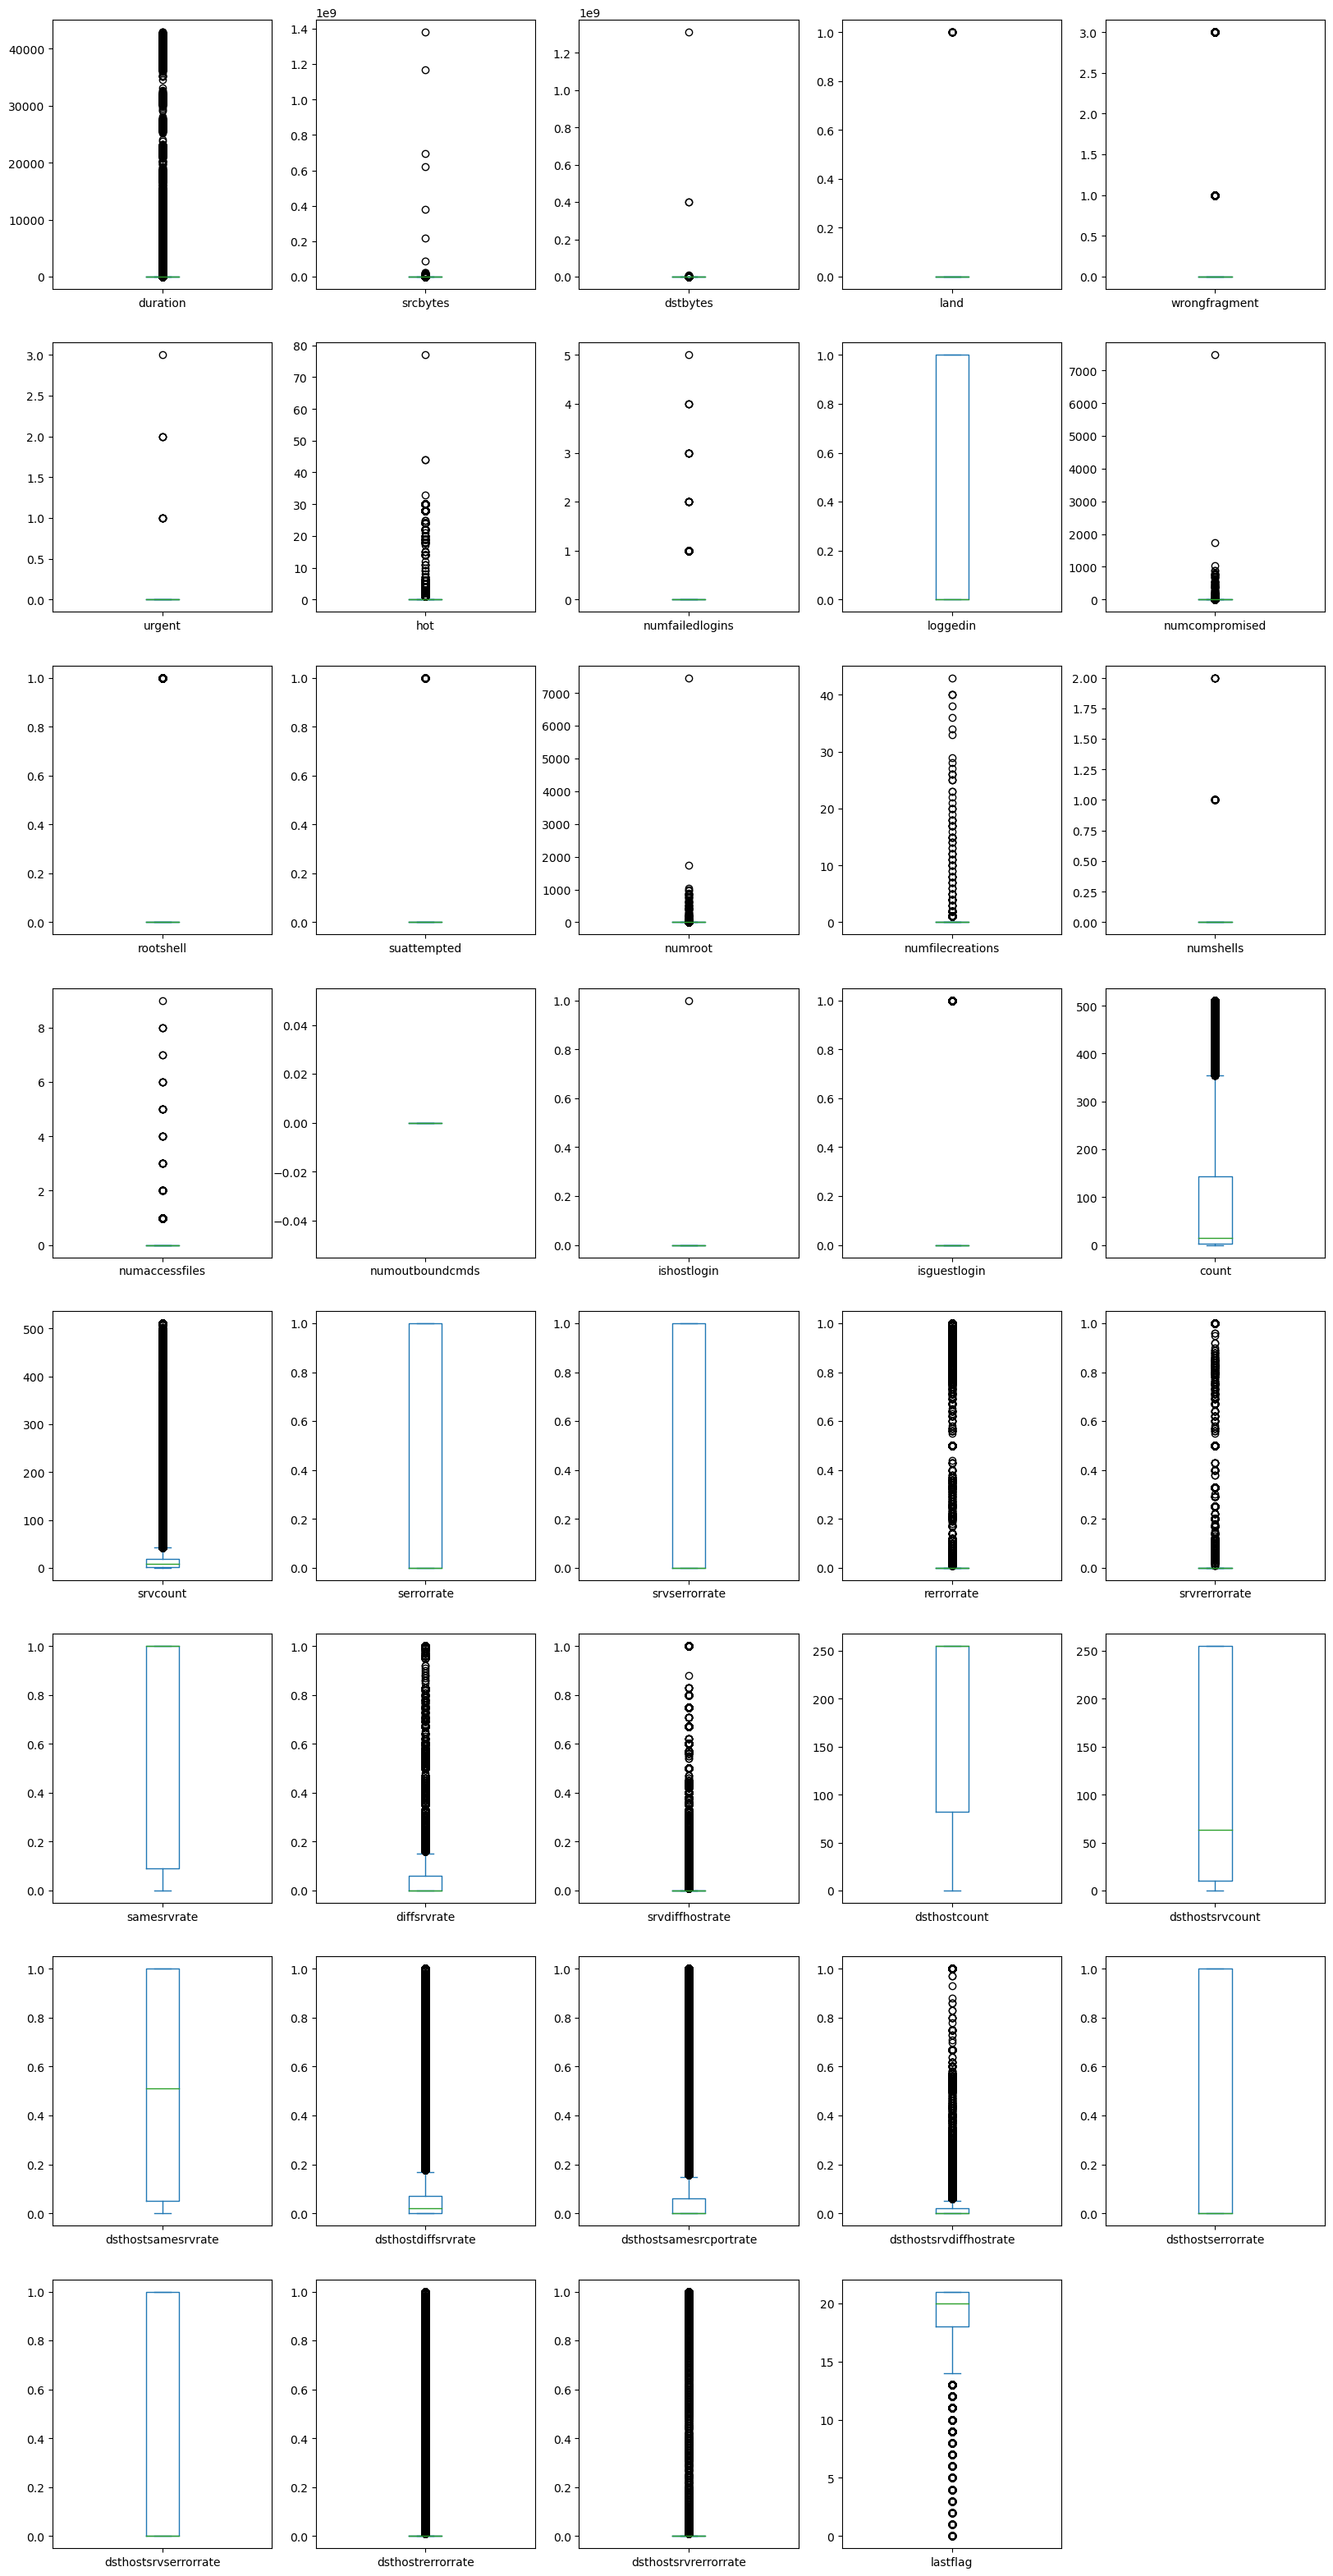

In [206]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

# Feature Engineering

## Type - Normal vs Attack

In [207]:
def type(x):
  if x == 'normal':
    return 'normal'
  else:
    return 'attack'

In [208]:
df['type'] = df['attack'].apply(type)

In [209]:
df.type.value_counts()

normal    67343
attack    58630
Name: type, dtype: int64

In [210]:
df.attack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

## Category - DoS, Probe, U2R, R2L

In [211]:
df.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [212]:
def attack_category(x):
  if x in ['neptune', 'teardrop', 'smurf', 'pod', 'back', 'land']:
    return 'DoS'
  elif x in ['rootkit', 'buffer_overflow', 'multihop', 'loadmodule', 'perl']:
    return 'U2R'
  elif x in ['ipsweep', 'nmap', 'portsweep', 'satan']:
    return 'Probe'
  elif x in ['guess_passwd', 'warezmaster', 'warezclient', 'imap', 'phf', 'spy', 'ftp_write']:
    return 'R2L'
  else:
    return 'normal'

In [213]:
df['attack_category']=df['attack'].apply(attack_category)

In [214]:
df.attack_category.value_counts()

normal    67343
DoS       45927
Probe     11656
R2L         988
U2R          59
Name: attack_category, dtype: int64

In [215]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

In [216]:
df['attack_distribution']=df[df['attack_category']!='normal']['attack_category']

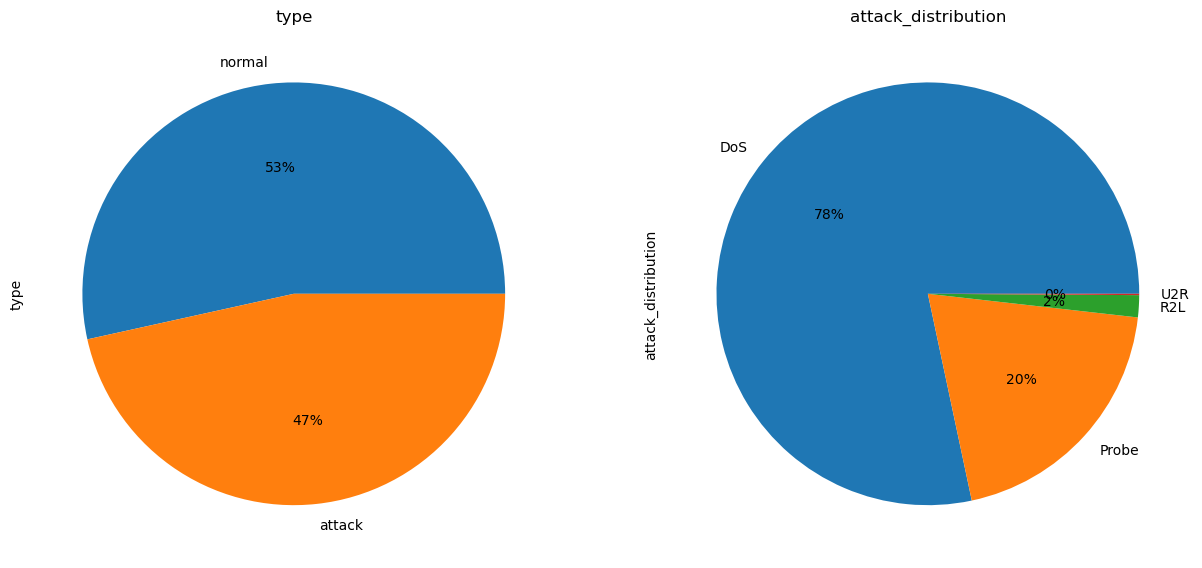

In [217]:
pie_plot(df, ['type', 'attack_distribution'], 1, 2)

**Pie Chart Insights**

- The data consists of almost **equal** distribution of normal vs attack records.
- **DoS** followed by **Probe** are the major attack types present in the dataset.

In [218]:
df.drop(['attack_distribution'], axis=1, inplace=True)

# EDA - Visualization

## Extract Numerical and Categorical Columns

In [219]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

## Univariate Analysis

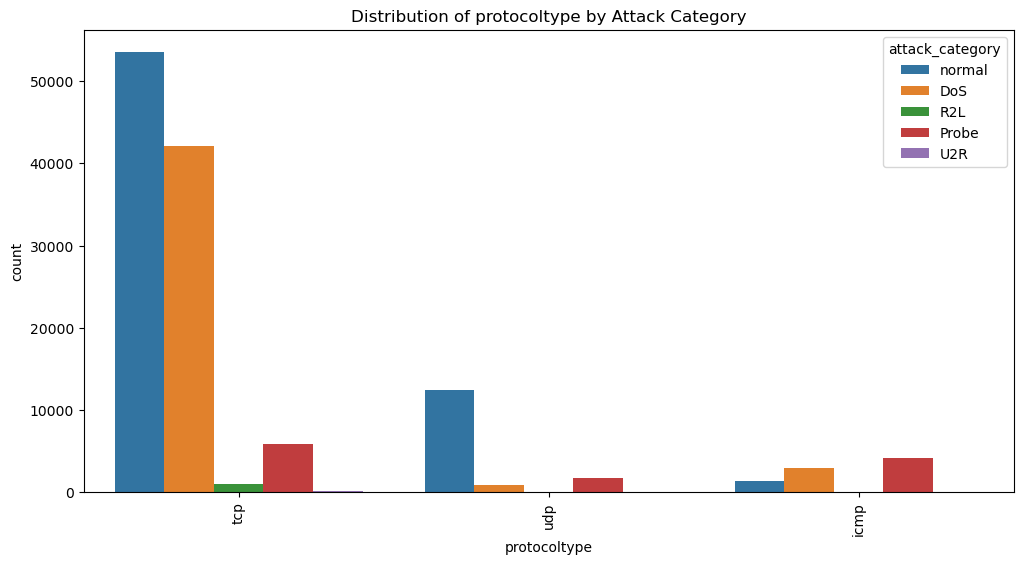

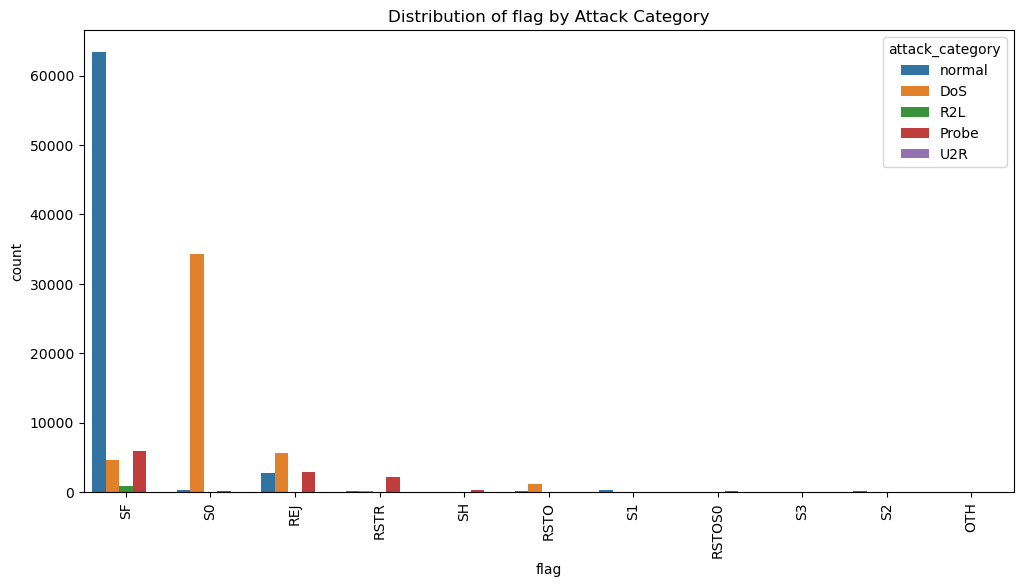

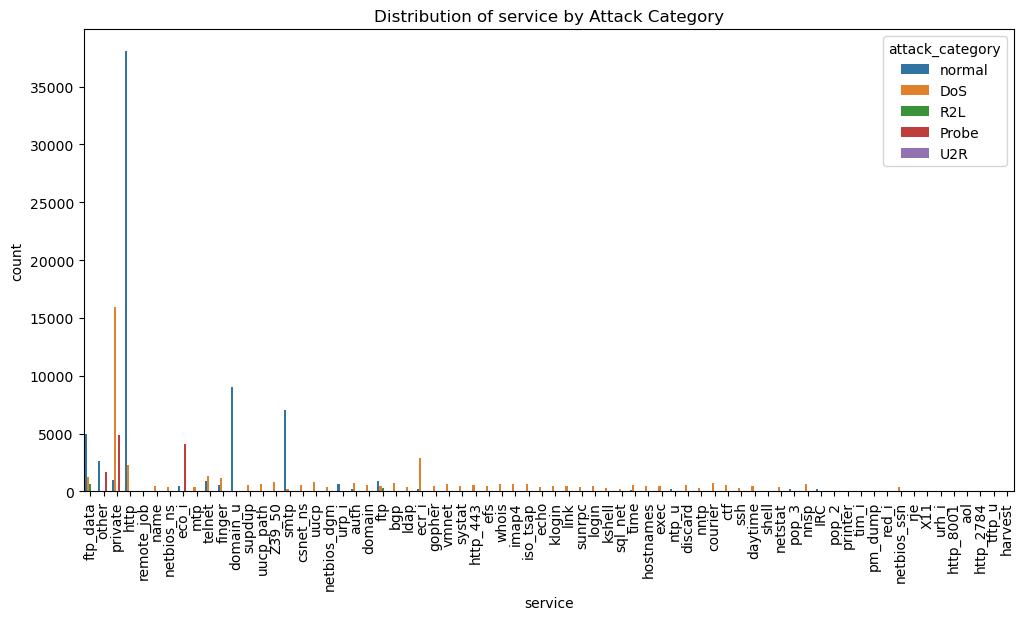

In [220]:
categorical_cols = ['protocoltype', 'flag', 'service']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='attack_category')
    plt.title(f'Distribution of {col} by Attack Category')
    plt.xticks(rotation=90)
    plt.show()

**Bar Chart Insights:**
- It can be observed that the most used protocol is **tcp** and the most used flag and service are **SF** and **http** respectively for the normal traffic.
- It can also be observed that **DoS** attacks are mainly targeted on **private** network.

## Bivariate Analysis
- There seems not much correlation between the features as observed for the scatterplots below.

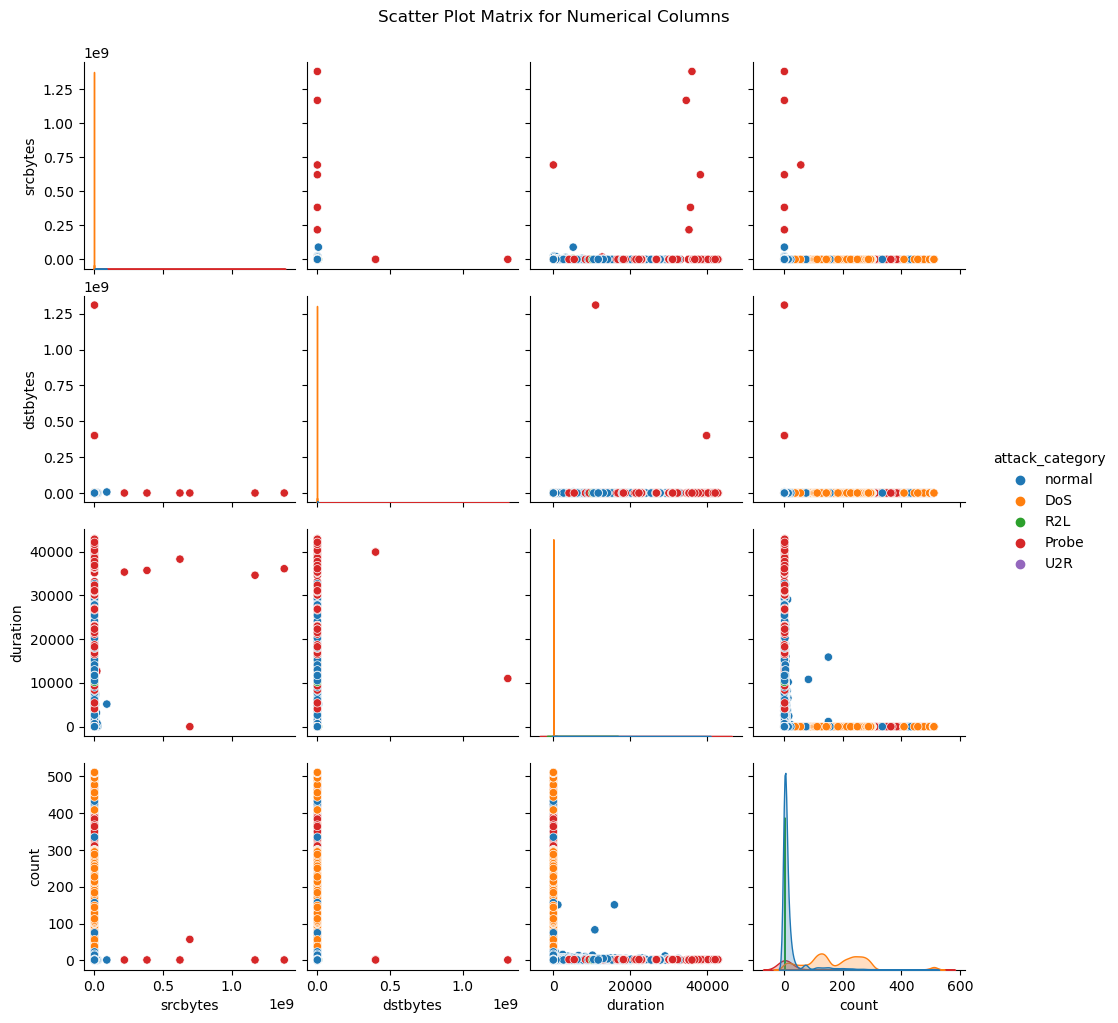

In [34]:
scatter_cols = ['srcbytes', 'dstbytes', 'duration', 'count']

sns.pairplot(df, vars=scatter_cols, hue='attack_category', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for Numerical Columns', y=1.02)
plt.show()

## Multivariate Analysis

### Label Encoding

In [221]:
# Duplicate dataset before label encoding for hypothesis testing
df_hyp = df.copy()

In [222]:
# Dictionary to store mappings
label_mappings = {}
# Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    # Store the mapping in the dictionary
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    
# Display the mappings
for col, mapping in label_mappings.items():
    print(f"Label encoding mapping for {col}: {mapping}")

Label encoding mapping for protocoltype: {'icmp': 0, 'tcp': 1, 'udp': 2}
Label encoding mapping for service: {'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10, 'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20, 'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29, 'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38, 'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47, 'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57, 'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i':

### Heatmap

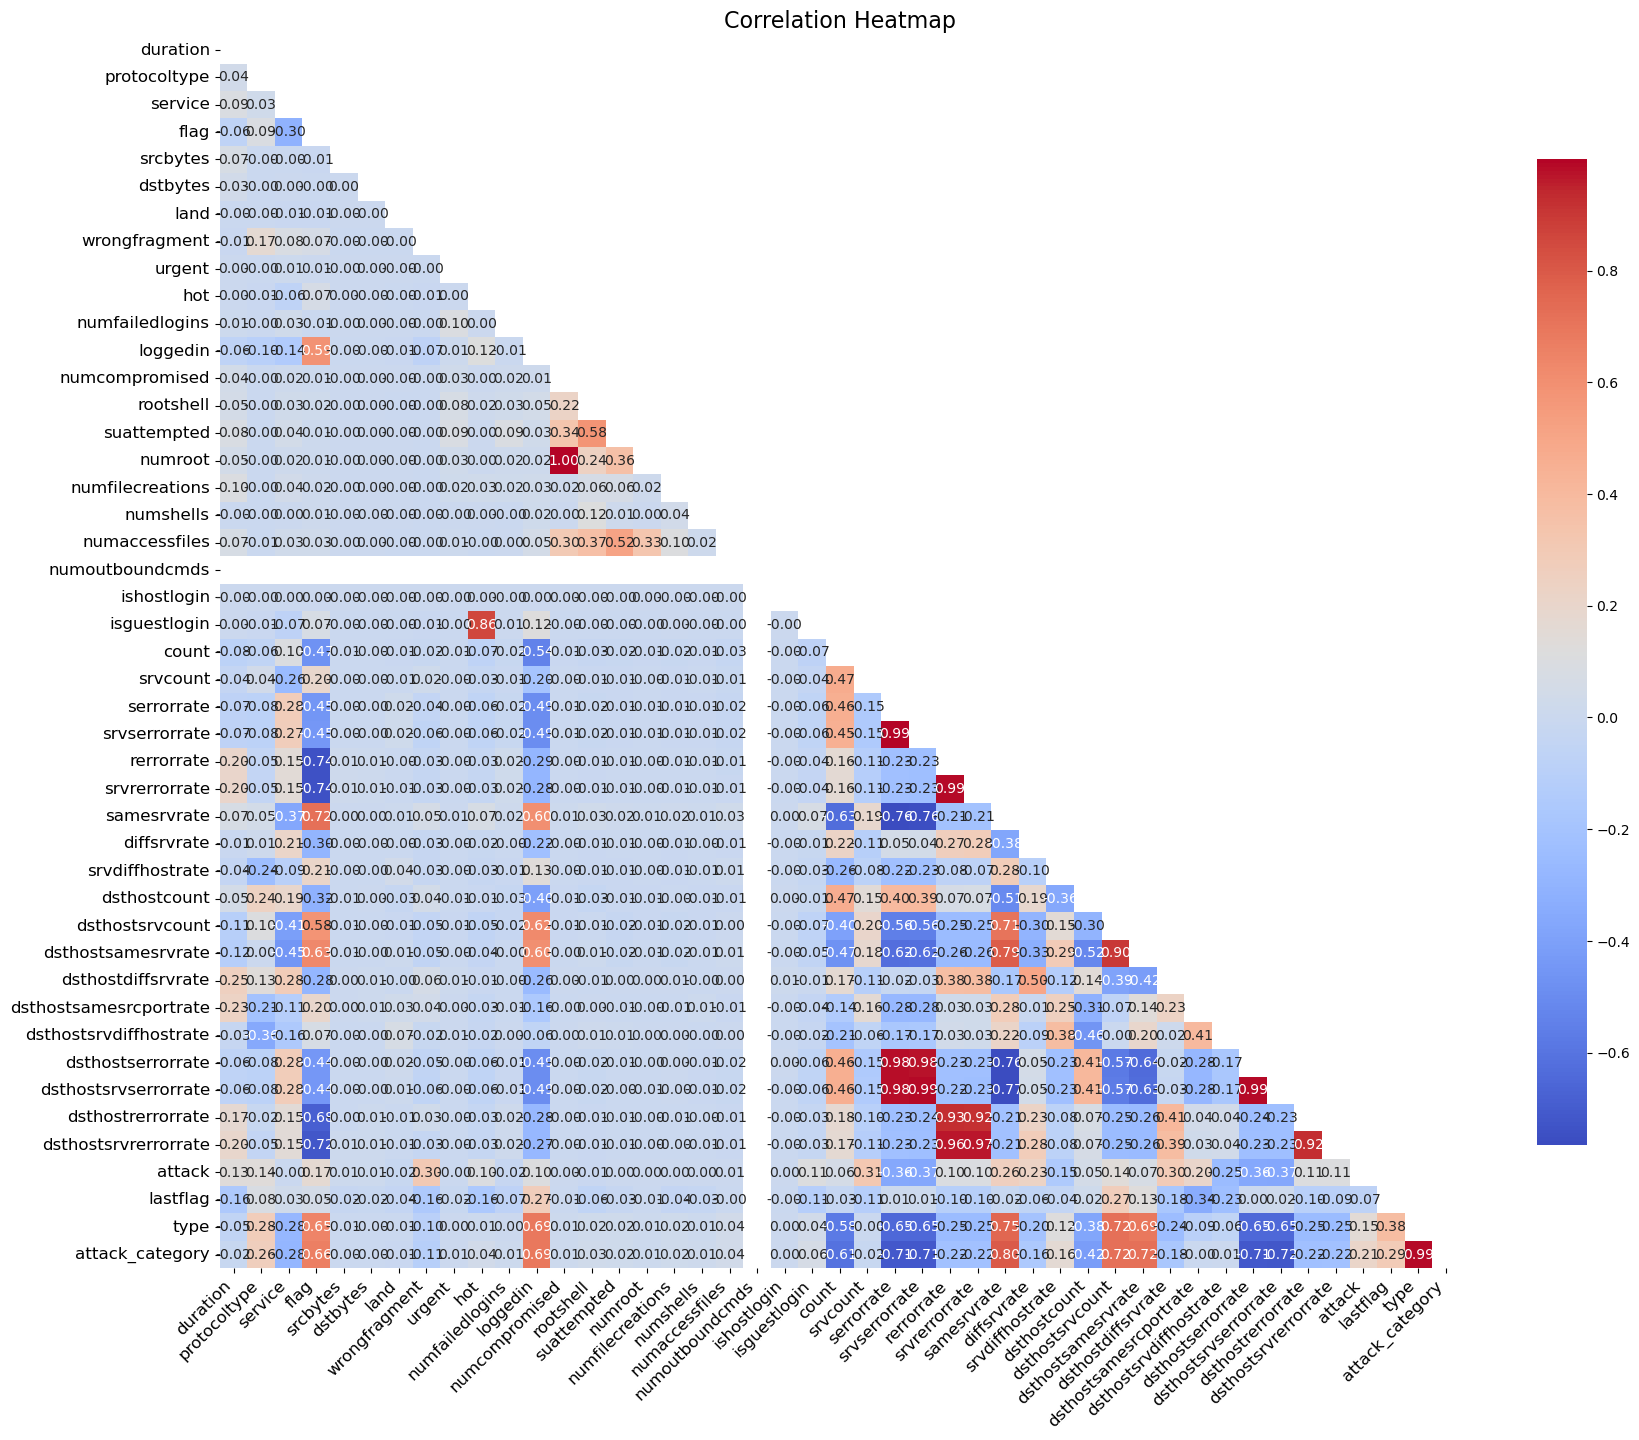

In [223]:
# Increase the figure size
plt.figure(figsize=(20, 16))

# Generate a mask for the upper triangle (optional, if you want to hide the upper triangle)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Create the heatmap
sns.heatmap(df.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add a title (optional)
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.show()

Dropped columns: ['loggedin', 'suattempted', 'numroot', 'numaccessfiles', 'isguestlogin', 'count', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'type', 'attack_category']
Remaining columns: ['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'numcompromised', 'rootshell', 'numfilecreations', 'numshells', 'numoutboundcmds', 'ishostlogin', 'srvcount', 'serrorrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'attack', 'lastflag']


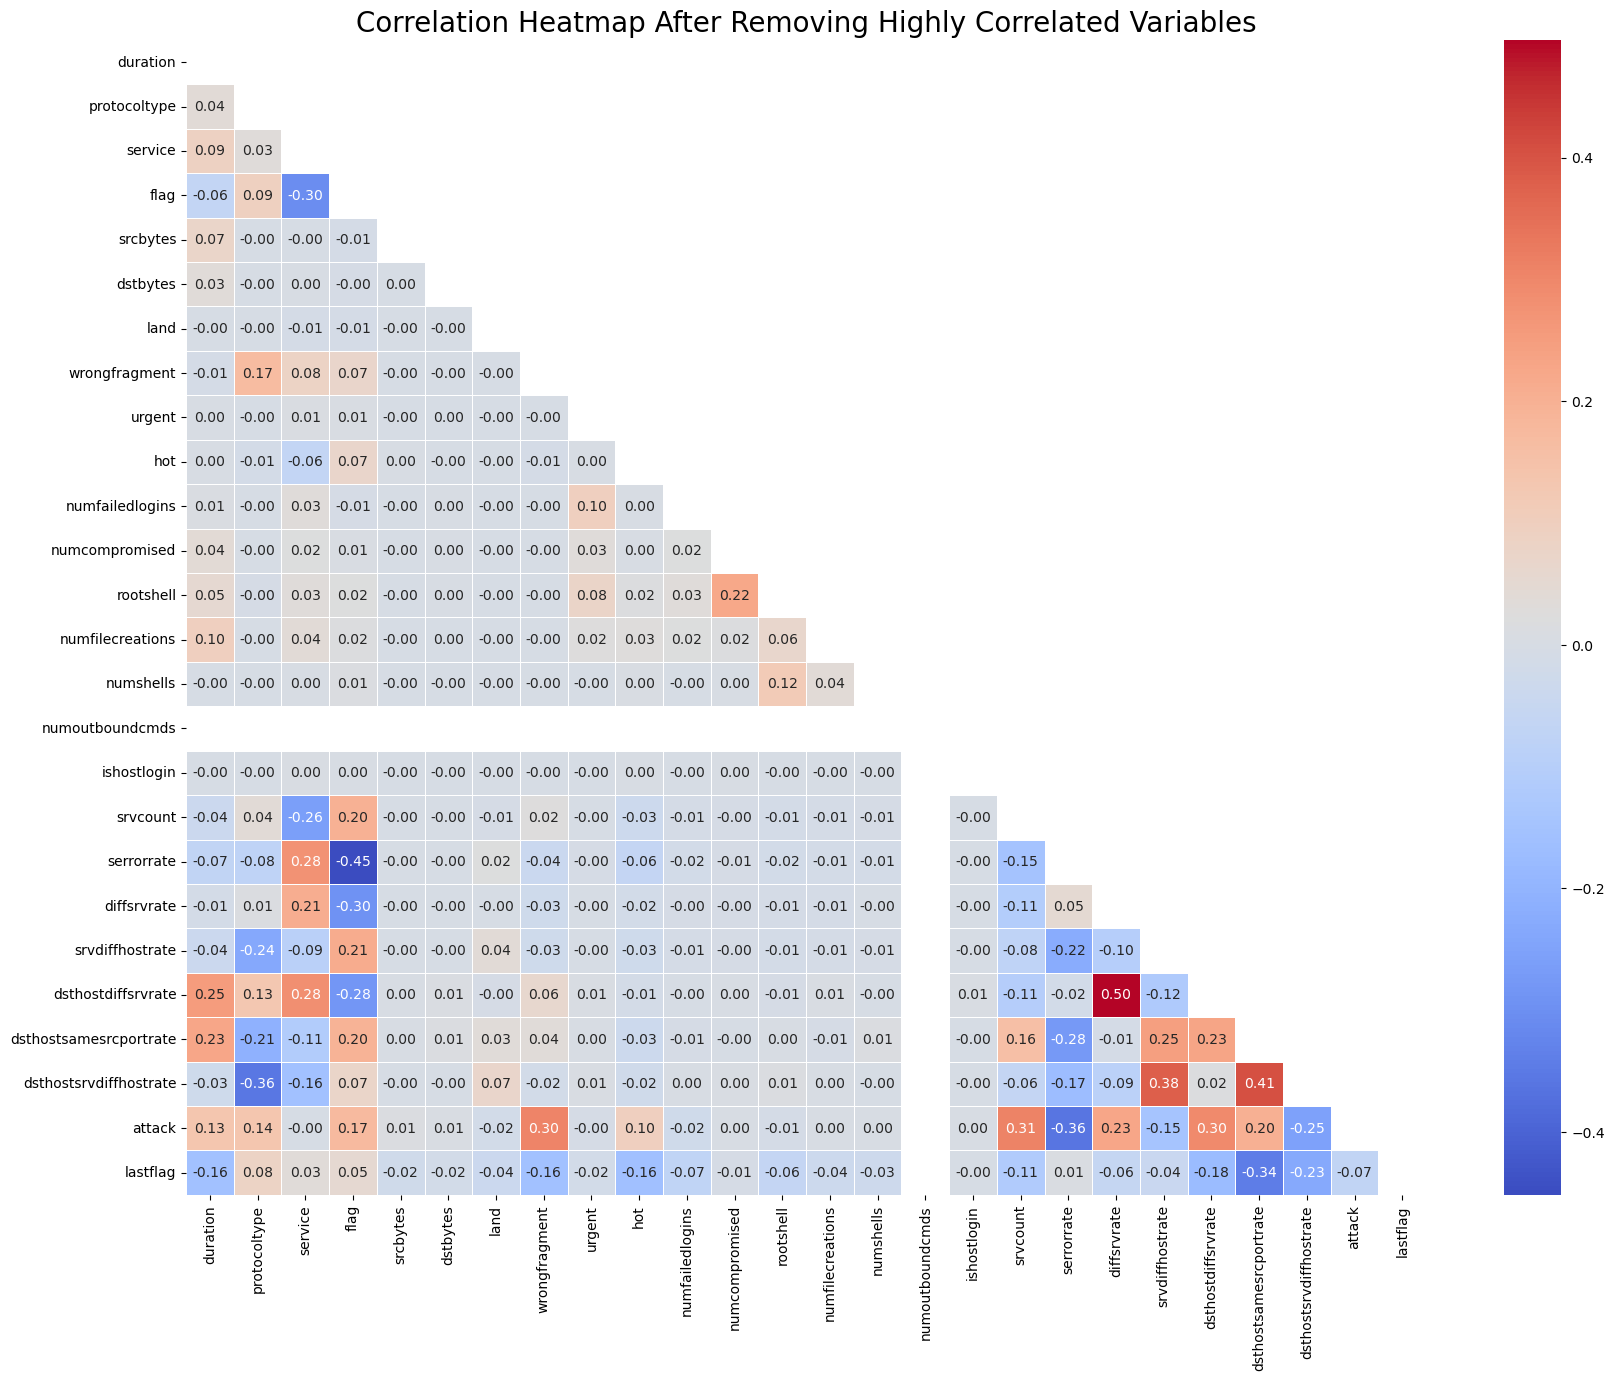

In [224]:
# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Identify upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]

# Drop features
df_reduced = df.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")
print(f"Remaining columns: {df_reduced.columns.tolist()}")

#mask
mask_t = np.triu(np.ones_like(df_reduced.corr(), dtype=bool))

# Optionally, display the reduced correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df_reduced.corr(), mask = mask_t, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Removing Highly Correlated Variables', size=20)
plt.show()

# Hypothesis Testing

## Network Traffic Volume - Normal vs Attack

In [45]:
normal = df_hyp[df_hyp['type']=='normal']
anomalous = df_hyp[df_hyp['type']!='normal']

In [47]:
# Perform t-tests
t_src, p_src = stats.ttest_ind(normal['srcbytes'], anomalous['srcbytes'], equal_var=False)
t_dst, p_dst = stats.ttest_ind(normal['dstbytes'], anomalous['dstbytes'], equal_var=False)

print(f"T-test for Src_bytes: t-statistic = {t_src}, p-value = {p_src}")
print(f"T-test for Dst_bytes: t-statistic = {t_dst}, p-value = {p_dst}")

T-test for Src_bytes: t-statistic = -1.9616326188727324, p-value = 0.0498099770203077
T-test for Dst_bytes: t-statistic = -1.3636319854318106, p-value = 0.17268865455671056


In [53]:
# Interpret the results
alpha = 0.05
if p_src < alpha:
    print("Reject the null hypothesis for Src_bytes: Significant difference in means between normal and anomalous connections.")
else:
    print("Fail to reject the null hypothesis for Src_bytes: No significant difference in means between normal and anomalous connections.")

print()

if p_dst < alpha:
    print("Reject the null hypothesis for Dst_bytes: Significant difference in means between normal and anomalous connections.")
else:
    print("Fail to reject the null hypothesis for Dst_bytes: No significant difference in means between normal and anomalous connections.")

Reject the null hypothesis for Src_bytes: Significant difference in means between normal and anomalous connections.

Fail to reject the null hypothesis for Dst_bytes: No significant difference in means between normal and anomalous connections.


## Network Traffic Volume - DoS, Probe, R2L, U2R 

In [54]:
dos = df_hyp[df_hyp['attack_category']=='DoS']
prb = df_hyp[df_hyp['attack_category']=='Probe']
r2l = df_hyp[df_hyp['attack_category']=='R2L']
u2r = df_hyp[df_hyp['attack_category']=='U2R']

In [55]:
# ANOVA for src_bytes
anova_src = stats.f_oneway(dos['srcbytes'], prb['srcbytes'], r2l['srcbytes'], u2r['srcbytes'])
print(f"ANOVA for src_bytes: F-statistic = {anova_src.statistic}, p-value = {anova_src.pvalue}")

# ANOVA for dst_bytes
anova_dst = stats.f_oneway(dos['dstbytes'], prb['dstbytes'], r2l['dstbytes'], u2r['dstbytes'])
print(f"ANOVA for dst_bytes: F-statistic = {anova_dst.statistic}, p-value = {anova_dst.pvalue}")

ANOVA for src_bytes: F-statistic = 6.441909948852057, p-value = 0.00023444768731015726
ANOVA for dst_bytes: F-statistic = 2.9378149665995164, p-value = 0.031885354760832436


In [56]:
# Interpret the results
alpha = 0.05
if anova_src.pvalue < alpha:
    print("Reject the null hypothesis for src_bytes: Significant difference in means between attack categories.")
else:
    print("Fail to reject the null hypothesis for src_bytes: No significant difference in means between attack categories.")

print()

if anova_dst.pvalue < alpha:
    print("Reject the null hypothesis for dst_bytes: Significant difference in means between attack categories.")
else:
    print("Fail to reject the null hypothesis for dst_bytes: No significant difference in means between attack categories.")

Reject the null hypothesis for src_bytes: Significant difference in means between attack categories.

Reject the null hypothesis for dst_bytes: Significant difference in means between attack categories.


In [57]:
# Combine data for Tukey's HSD test
src_bytes_data = df_hyp[['attack_category', 'srcbytes']]
dst_bytes_data = df_hyp[['attack_category', 'dstbytes']]

# Perform Tukey's HSD test for src_bytes
tukey_src_bytes = pairwise_tukeyhsd(endog=src_bytes_data['srcbytes'], groups=src_bytes_data['attack_category'], alpha=0.05)
print(tukey_src_bytes)

# Perform Tukey's HSD test for dst_bytes
tukey_dst_bytes = pairwise_tukeyhsd(endog=dst_bytes_data['dstbytes'], groups=dst_bytes_data['attack_category'], alpha=0.05)
print(tukey_dst_bytes)


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj      lower        upper     reject
-------------------------------------------------------------------
   DoS  Probe  384503.5172    0.0   218454.1254   550552.909   True
   DoS    R2L  308728.1505 0.4743  -206076.3121  823532.6131  False
   DoS    U2R    -325.9822    1.0  -2086025.432 2085373.4676  False
   DoS normal   11956.9582 0.9972   -84932.4126  108846.3289  False
 Probe    R2L  -75775.3667 0.9951  -606278.5029  454727.7695  False
 Probe    U2R -384829.4994 0.9872 -2474459.1646 1704800.1658  False
 Probe normal  -372546.559    0.0  -533162.5389 -211930.5791   True
   R2L    U2R -309054.1327  0.995 -2454748.2796 1836640.0142  False
   R2L normal -296771.1923 0.5117  -809848.8933  216306.5086  False
   U2R normal   12282.9403    1.0 -2072990.9715 2097556.8522  False
-------------------------------------------------------------------
        Multiple Comparison of Means - Tukey HSD

Summary of Tukey HSD Test Results:
* Significant Differences:

    * **DoS vs. Probe:** There is a significant difference in means between DoS and Probe attack categories for both comparisons (meandiff: 384503.5172 and 180905.7103, p-adj: 0.0 and 0.0001, respectively).
    * **Probe vs. Normal:** There is a significant difference in means between Probe and normal categories for both comparisons (meandiff: -372546.559 and -176745.2266, p-adj: 0.0 and 0.0001, respectively).

- No significant difference in means was found between other attack categories (DoS vs. R2L, DoS vs. U2R, DoS vs. normal, Probe vs. R2L, Probe vs. U2R, R2L vs. U2R, R2L vs. normal, U2R vs. normal) as indicated by high p-adj values (all > 0.05).

This indicates that the means of Src_bytes and Dst_bytes significantly differ between DoS and Probe, and between Probe and normal, suggesting these categories have distinct traffic volume characteristics.

## Impact of Protocol Type

In [58]:
# Create a contingency table
contingency_table = pd.crosstab(df_hyp['protocoltype'], df_hyp['attack_category'] != 'normal')

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: Significant association between protocol type and anomaly detection.")
else:
    print("Fail to reject the null hypothesis: No significant association between protocol type and anomaly detection.")


Chi-square Statistic: 10029.24862778463
P-value: 0.0
Reject the null hypothesis: Significant association between protocol type and anomaly detection.


## Impact of Flag

In [59]:
# Assuming df_hyp is your dataframe and 'attack_category' is the target variable

# Prepare the data
df_hyp['is_anomaly'] = np.where(df_hyp['attack_category'] == 'normal', 0, 1)
X = pd.get_dummies(df_hyp['flag'], drop_first=True)
y = df_hyp['is_anomaly']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

# Print the coefficients
coefficients = pd.DataFrame(log_reg.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

# Interpret the significance
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
print(result.summary())


              precision    recall  f1-score   support

           0       0.84      0.95      0.89     13422
           1       0.93      0.80      0.86     11773

    accuracy                           0.88     25195
   macro avg       0.89      0.88      0.88     25195
weighted avg       0.89      0.88      0.88     25195

        Coefficient
REJ        0.207499
RSTO       0.898415
RSTOS0     2.570058
RSTR       1.777740
S0         3.629234
S1        -4.412445
S2        -3.148212
S3        -2.809849
SF        -2.644938
SH         2.958725
         Current function value: 0.330269
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             is_anomaly   No. Observations:               100778
Model:                          Logit   Df Residuals:                   100767
Method:                           MLE   Df Model:                           10
Date:                Sun, 04 Aug 2024   Pseudo R-squ.:                 

Summary of Results:

* Classification Report:

    * Overall Accuracy: 88%

    * Precision, Recall, F1-Score:

        * Class 0 (Normal): High precision (0.84), recall (0.95), and F1-score (0.89).
        * Class 1 (Anomalous): High precision (0.93), recall (0.80), and F1-score (0.86).

This indicates that the model is effective at identifying both normal and anomalous connections, though it is slightly better at identifying normal connections.

* Logistic Regression Coefficients:

    * Positive Coefficients: Flags like S0, SH, RSTR have significant positive coefficients, indicating a higher likelihood of anomalies.

    * Negative Coefficients: Flags like S1, S2, S3, SF have significant negative coefficients, indicating a lower likelihood of anomalies.

* Statistical Significance (p-values):

    * Flags such as RSTO, RSTR, S0, S1, S2, S3, SF, and SH have p-values < 0.05, indicating they are significantly associated with anomalies.
    * Flags REJ and RSTOS0 are not significant (p > 0.05).

# Model Building

## Data Imbalance - SMOTE

In [225]:
df['attack_category'].value_counts()

4    67343
0    45927
1    11656
2      988
3       59
Name: attack_category, dtype: int64

In [226]:
# Apply SMOTE on the attack type '2' and '3'
smote = SMOTE(sampling_strategy={3: 150, 2:1000})
X = df.drop(columns=['attack_category', 'attack', 'type'])
y = df['attack_category']

X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['attack_category'] = y_resampled

In [227]:
df['attack_category'].value_counts()

4    67343
0    45927
1    11656
2     1000
3      150
Name: attack_category, dtype: int64

## Standardize the Data

In [228]:
X = df.drop('attack_category', axis=1)
y = df['attack_category']

In [229]:
X.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [230]:
col = X.columns

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=col)

## Train Test Split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

## **Supervised Learning**

In [232]:
labels = le.classes_

In [70]:
mlflow.set_experiment('Network Anomaly Detection')

<Experiment: artifact_location='file:///Users/saumyanishi/mlruns/457396215723975242', creation_time=1719590350839, experiment_id='457396215723975242', last_update_time=1719590350839, lifecycle_stage='active', name='Network Anomaly Detection', tags={}>

### SVC

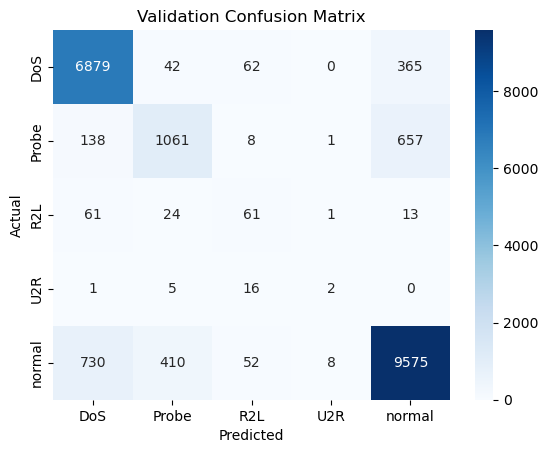

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      7348
           1       0.69      0.57      0.62      1865
           2       0.31      0.38      0.34       160
           3       0.17      0.08      0.11        24
           4       0.90      0.89      0.90     10775

    accuracy                           0.87     20172
   macro avg       0.59      0.57      0.58     20172
weighted avg       0.87      0.87      0.87     20172



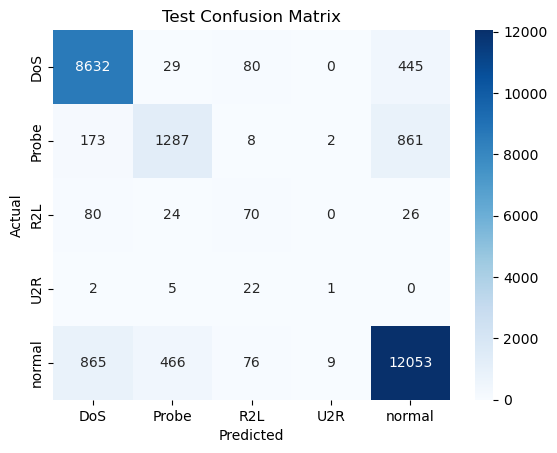

Test Classification Report:
               precision    recall  f1-score   support

         DoS       0.89      0.94      0.91      9186
       Probe       0.71      0.55      0.62      2331
         R2L       0.27      0.35      0.31       200
         U2R       0.08      0.03      0.05        30
      normal       0.90      0.89      0.90     13469

    accuracy                           0.87     25216
   macro avg       0.57      0.55      0.56     25216
weighted avg       0.87      0.87      0.87     25216



In [71]:
# Start MLflow run
with mlflow.start_run():
    
    # Train the model
    svm = SVC(kernel='sigmoid', random_state=42)
    svm.fit(X_train, y_train)

    # Validation Data
    # Prediction
    y_pred_val = svm.predict(X_val)

    # Set tag
    mlflow.set_tag('mlflow.runName', 'svm_sig')

    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)

    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')

    # Classification Report
    classification_report_val = classification_report(y_val, y_pred_val)
    print('Validation Classification Report:\n', classification_report_val)

    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')

    # Test Data
    # Prediction
    y_pred = svm.predict(X_test)

    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)

    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')

    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)

    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log parameters
    mlflow.log_param("kernel", "sigmoid")

    # Log model
    mlflow.sklearn.log_model(svm, "model")

### RandomForest Classification

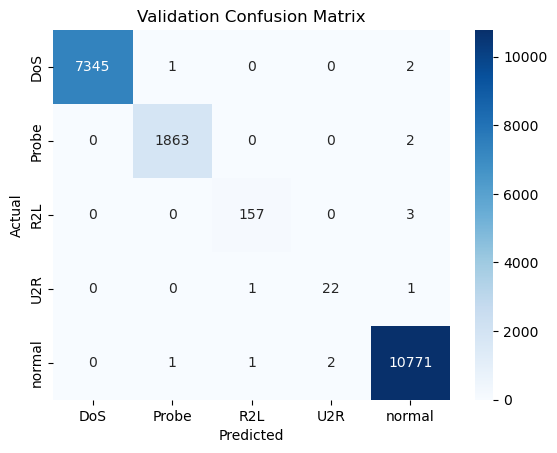

Validation Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      7348
       Probe       1.00      1.00      1.00      1865
         R2L       0.99      0.98      0.98       160
         U2R       0.92      0.92      0.92        24
      normal       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.98      0.98      0.98     20172
weighted avg       1.00      1.00      1.00     20172



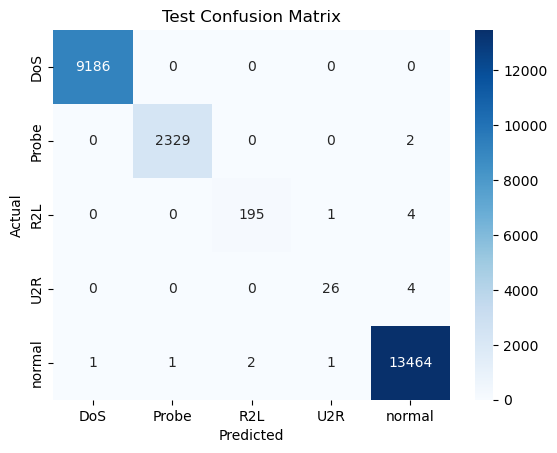

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.99      0.97      0.98       200
         U2R       0.93      0.87      0.90        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.98      0.97      0.98     25216
weighted avg       1.00      1.00      1.00     25216



In [234]:
with mlflow.start_run():
    # Train the model
    rfc = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    rfc.fit(X_train, y_train)
    
    # Validation Data
    # Prediction
    y_pred_val = rfc.predict(X_val)
    
    # set tag
    mlflow.set_tag('mlflow.runName', 'rf_200_d20')
    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)
    
    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')
    
    # Classification Report
    y_val_transform = le.inverse_transform(y_val)
    y_pred_val_transform = le.inverse_transform(y_pred_val)
    classification_report_val = classification_report(y_val_transform, y_pred_val_transform)
    print('Validation Classification Report:\n', classification_report_val)
    
    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')
    
    # Test Data
    # Prediction
    y_pred = rfc.predict(X_test)
    
    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')
    
    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)
    
    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log model
    mlflow.sklearn.log_model(rfc, "model")

    # Log parameters
    mlflow.log_param("n_estimators", rfc.n_estimators)
    mlflow.log_param("max_depth", rfc.max_depth)
    mlflow.log_param("random_state", rfc.random_state)

#### Feature Importance

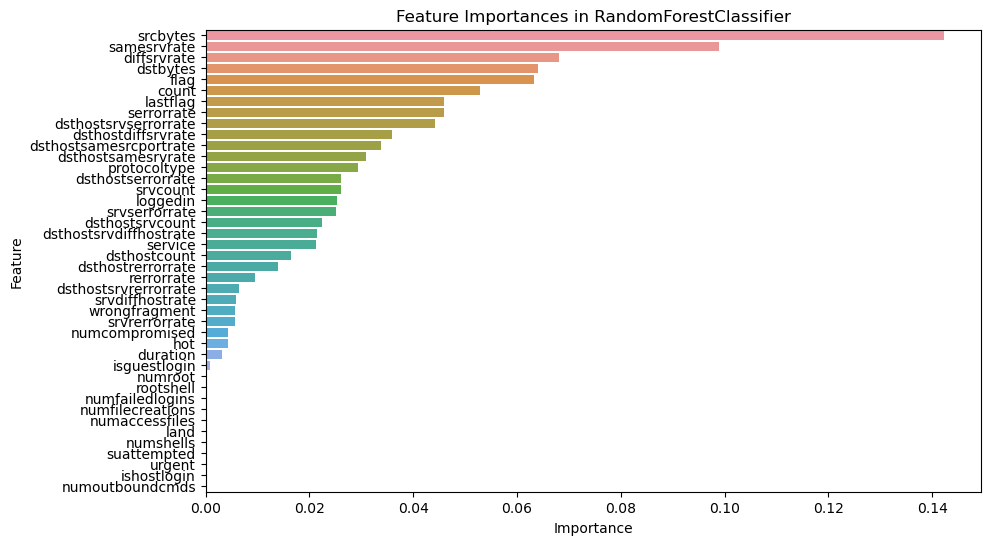

In [235]:
# Get feature importances
feature_importances = rfc.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in RandomForestClassifier')
plt.show()

#### Feature Reduction

In [236]:
df_red = feature_importance_df[feature_importance_df['Importance']<=0.015]
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 39 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature     21 non-null     object 
 1   Importance  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [237]:
cols = df_red['Feature'].tolist()
cols

['dsthostrerrorrate',
 'rerrorrate',
 'dsthostsrvrerrorrate',
 'srvdiffhostrate',
 'wrongfragment',
 'srvrerrorrate',
 'numcompromised',
 'hot',
 'duration',
 'isguestlogin',
 'numroot',
 'rootshell',
 'numfailedlogins',
 'numfilecreations',
 'numaccessfiles',
 'land',
 'numshells',
 'suattempted',
 'urgent',
 'ishostlogin',
 'numoutboundcmds']

In [238]:
X_train_red = X_train.drop(cols, axis=1)
X_val_red = X_val.drop(cols, axis=1)
X_test_red = X_test.drop(cols, axis=1)

In [263]:
X_train_red.columns

Index(['protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'loggedin',
       'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'samesrvrate',
       'diffsrvrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'lastflag'],
      dtype='object')

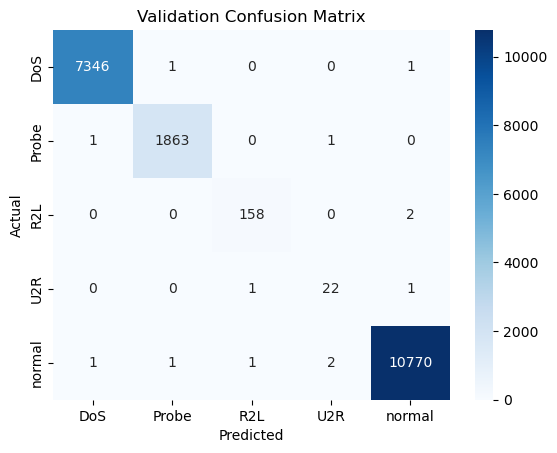

Validation Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      7348
       Probe       1.00      1.00      1.00      1865
         R2L       0.99      0.99      0.99       160
         U2R       0.88      0.92      0.90        24
      normal       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.97      0.98      0.98     20172
weighted avg       1.00      1.00      1.00     20172



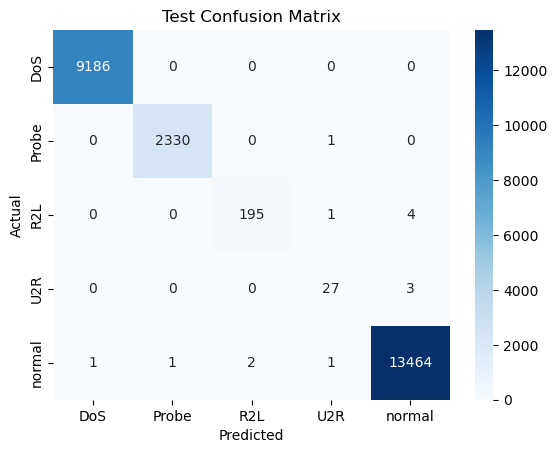

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.99      0.97      0.98       200
         U2R       0.90      0.90      0.90        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.98      0.97      0.98     25216
weighted avg       1.00      1.00      1.00     25216



In [239]:
with mlflow.start_run():
    # Train the model
    rfc = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    rfc.fit(X_train_red, y_train)
    
    # set tag
    mlflow.set_tag('mlflow.runName', 'rf_red_200_d20_red21')
    
    # Validation Data
    # Prediction
    y_pred_val = rfc.predict(X_val_red)
    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)
    
    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')
    
    # Classification Report
    y_val_transform = le.inverse_transform(y_val)
    y_pred_val_transform = le.inverse_transform(y_pred_val)
    classification_report_val = classification_report(y_val_transform, y_pred_val_transform)
    print('Validation Classification Report:\n', classification_report_val)
    
    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')
    
    # Test Data
    # Prediction
    y_pred = rfc.predict(X_test_red)
    
    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')
    
    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)
    
    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log model
    mlflow.sklearn.log_model(rfc, "model")

    # Log parameters
    mlflow.log_param("n_estimators", rfc.n_estimators)
    mlflow.log_param("max_depth", rfc.max_depth)
    mlflow.log_param("random_state", rfc.random_state)

### GBDT

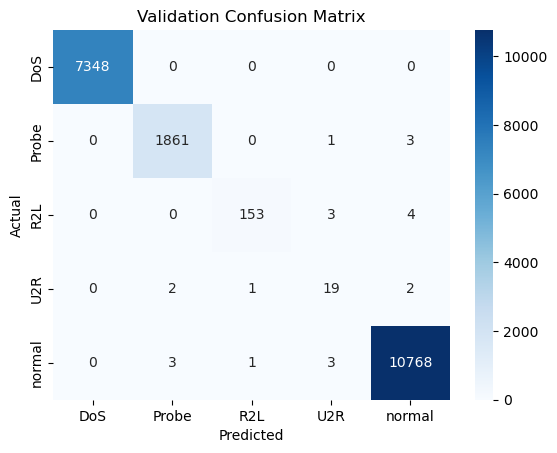

Validation Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      7348
       Probe       1.00      1.00      1.00      1865
         R2L       0.99      0.96      0.97       160
         U2R       0.73      0.79      0.76        24
      normal       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.94      0.95      0.95     20172
weighted avg       1.00      1.00      1.00     20172



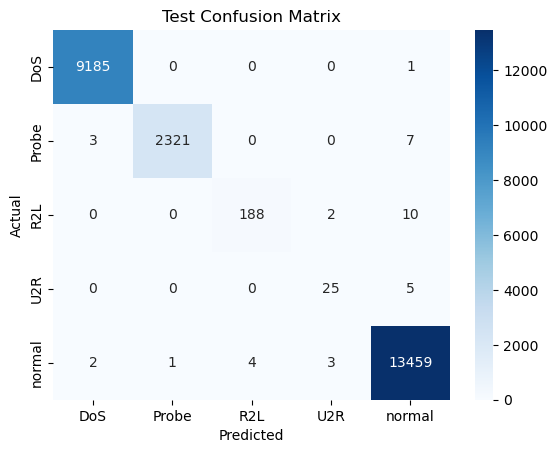

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.98      0.94      0.96       200
         U2R       0.83      0.83      0.83        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.96      0.95      0.96     25216
weighted avg       1.00      1.00      1.00     25216



In [97]:
with mlflow.start_run():
    # Train the model
    gbt = GradientBoostingClassifier(n_estimators=50, max_depth=20, learning_rate=0.05, random_state=42)
    gbt.fit(X_train, y_train)
    
    # Validation Data
    # Prediction
    y_pred_val = gbt.predict(X_val)
    
    # set tag
    mlflow.set_tag('mlflow.runName', 'gbdt_50_d20_l0.05')
    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)
    
    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')
    
    # Classification Report
    y_val_transform = le.inverse_transform(y_val)
    y_pred_val_transform = le.inverse_transform(y_pred_val)
    classification_report_val = classification_report(y_val_transform, y_pred_val_transform)
    print('Validation Classification Report:\n', classification_report_val)
    
    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')
    
    # Test Data
    # Prediction
    y_pred = gbt.predict(X_test)
    
    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')
    
    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)
    
    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log model
    mlflow.sklearn.log_model(gbt, "model")

    # Log parameters
    mlflow.log_param("n_estimators", gbt.n_estimators)
    mlflow.log_param("max_depth", gbt.max_depth)
    mlflow.log_param("random_state", gbt.random_state)

### XGBoost

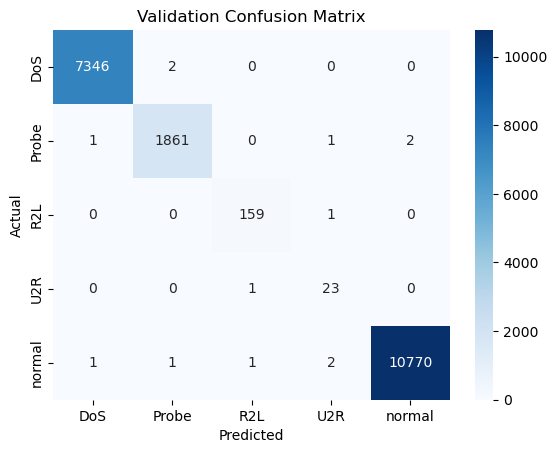

Validation Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      7348
       Probe       1.00      1.00      1.00      1865
         R2L       0.99      0.99      0.99       160
         U2R       0.85      0.96      0.90        24
      normal       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.97      0.99      0.98     20172
weighted avg       1.00      1.00      1.00     20172



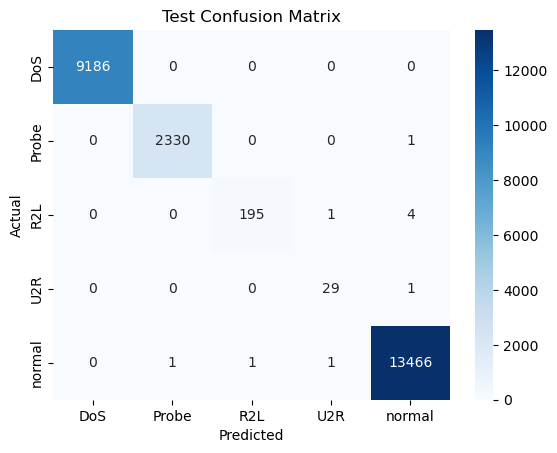

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.99      0.97      0.98       200
         U2R       0.94      0.97      0.95        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.99      0.99      0.99     25216
weighted avg       1.00      1.00      1.00     25216



In [135]:
with mlflow.start_run():
    # Train the model
    xgb = XGBClassifier(n_estimators=250, max_depth=20, learning_rate=0.07, random_state=42)
    xgb.fit(X_train, y_train)
    
    # set tag
    mlflow.set_tag('mlflow.runName', 'xgb_n250_d20_l.07')
        
    # Validation Data
    # Prediction
    y_pred_val = xgb.predict(X_val)
    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)
    
    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')
    
    # Classification Report
    y_val_transform = le.inverse_transform(y_val)
    y_pred_val_transform = le.inverse_transform(y_pred_val)
    classification_report_val = classification_report(y_val_transform, y_pred_val_transform)
    print('Validation Classification Report:\n', classification_report_val)
    
    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')
    
    # Test Data
    # Prediction
    y_pred = xgb.predict(X_test)
    
    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')
    
    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)
    
    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log model
    mlflow.sklearn.log_model(xgb, "model")

    # Log parameters
    mlflow.log_param("n_estimators", xgb.n_estimators)
    mlflow.log_param("max_depth", xgb.max_depth)
    mlflow.log_param("learning_rate", xgb.learning_rate)
    mlflow.log_param("random_state", xgb.random_state)

#### Feature Importance

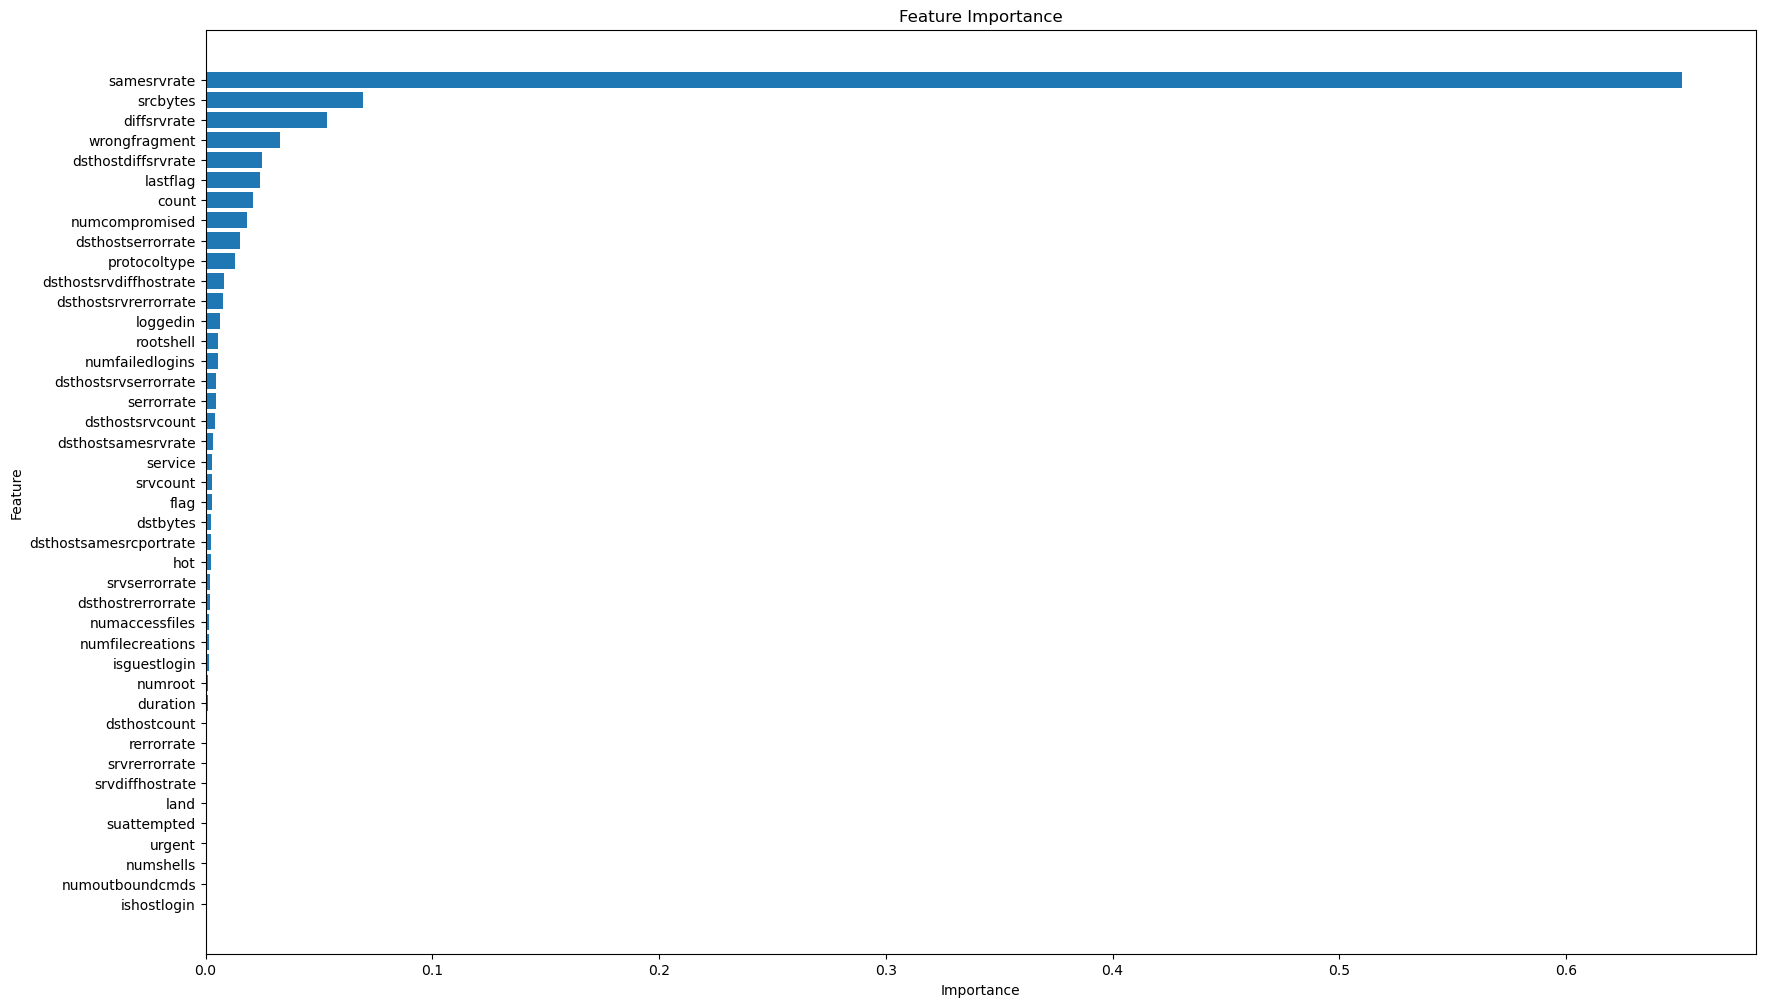

In [100]:
# Plot feature importance
# Get feature importances
feature_importances = xgb.feature_importances_

# Create a DataFrame
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(20,12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

#### Feature Reduction

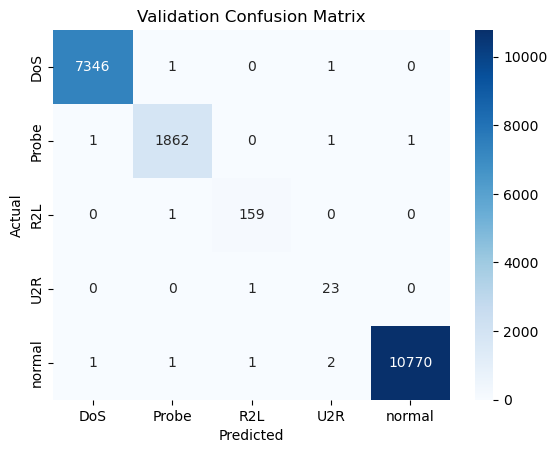

Validation Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      7348
       Probe       1.00      1.00      1.00      1865
         R2L       0.99      0.99      0.99       160
         U2R       0.85      0.96      0.90        24
      normal       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.97      0.99      0.98     20172
weighted avg       1.00      1.00      1.00     20172



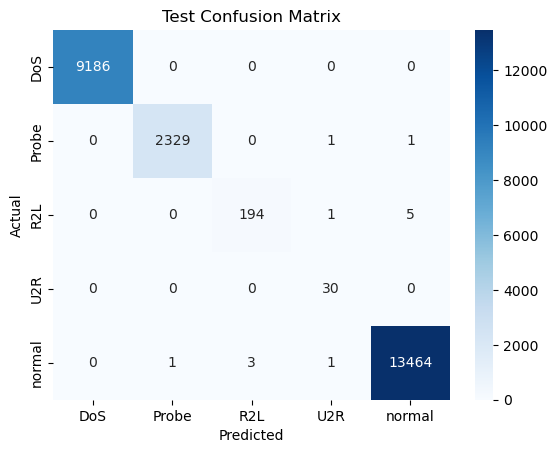

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.98      0.97      0.98       200
         U2R       0.91      1.00      0.95        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.98      0.99      0.99     25216
weighted avg       1.00      1.00      1.00     25216



In [240]:
with mlflow.start_run():
    # Train the model
    xgb = XGBClassifier(n_estimators=250, max_depth=20, learning_rate=0.07, random_state=42)
    xgb.fit(X_train_red, y_train)
    
    # set tag
    mlflow.set_tag('mlflow.runName', 'xgb_n250_d20_l.07_red21')
        
    # Validation Data
    # Prediction
    y_pred_val = xgb.predict(X_val_red)
    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)
    
    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')
    
    # Classification Report
    y_val_transform = le.inverse_transform(y_val)
    y_pred_val_transform = le.inverse_transform(y_pred_val)
    classification_report_val = classification_report(y_val_transform, y_pred_val_transform)
    print('Validation Classification Report:\n', classification_report_val)
    
    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')
    
    # Test Data
    # Prediction
    y_pred = xgb.predict(X_test_red)
    
    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')
    
    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)
    
    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log model
    mlflow.sklearn.log_model(xgb, "model")

    # Log parameters
    mlflow.log_param("n_estimators", xgb.n_estimators)
    mlflow.log_param("max_depth", xgb.max_depth)
    mlflow.log_param("learning_rate", xgb.learning_rate)
    mlflow.log_param("random_state", xgb.random_state)

### AdaBoost

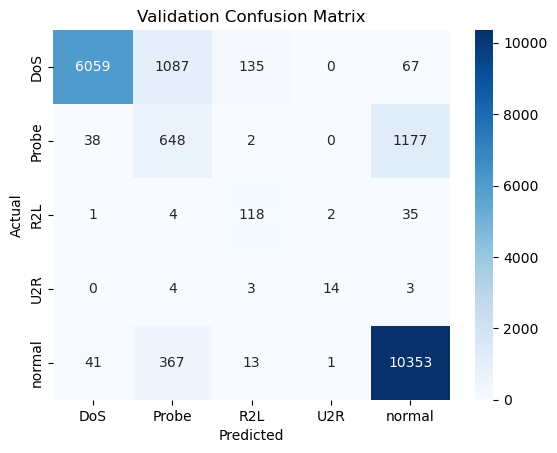

Validation Classification Report:
               precision    recall  f1-score   support

         DoS       0.99      0.82      0.90      7348
       Probe       0.31      0.35      0.33      1865
         R2L       0.44      0.74      0.55       160
         U2R       0.82      0.58      0.68        24
      normal       0.89      0.96      0.92     10775

    accuracy                           0.85     20172
   macro avg       0.69      0.69      0.68     20172
weighted avg       0.87      0.85      0.86     20172



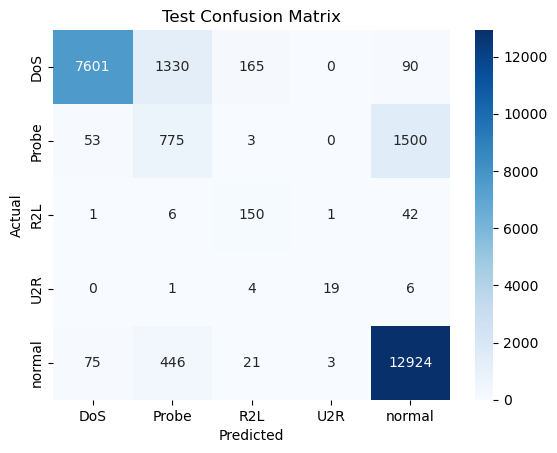

Test Classification Report:
               precision    recall  f1-score   support

         DoS       0.98      0.83      0.90      9186
       Probe       0.30      0.33      0.32      2331
         R2L       0.44      0.75      0.55       200
         U2R       0.83      0.63      0.72        30
      normal       0.89      0.96      0.92     13469

    accuracy                           0.85     25216
   macro avg       0.69      0.70      0.68     25216
weighted avg       0.86      0.85      0.85     25216



In [102]:
with mlflow.start_run():
    # Train the model
    adb = AdaBoostClassifier(random_state=42)
    adb.fit(X_train, y_train)
    
    # set tag
    mlflow.set_tag('mlflow.runName', 'adb')
    
    # Validation Data
    # Prediction
    y_pred_val = adb.predict(X_val)
    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)
    
    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')
    
    # Classification Report
    y_val_transform = le.inverse_transform(y_val)
    y_pred_val_transform = le.inverse_transform(y_pred_val)
    classification_report_val = classification_report(y_val_transform, y_pred_val_transform)
    print('Validation Classification Report:\n', classification_report_val)
    
    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')
    
    # Test Data
    # Prediction
    y_pred = adb.predict(X_test)
    
    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')
    
    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)
    
    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log model
    mlflow.sklearn.log_model(adb, "model")

    # Log parameters
    mlflow.log_param("n_estimators", adb.n_estimators)
    mlflow.log_param("random_state", adb.random_state)

### LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3149
[LightGBM] [Info] Number of data points in the train set: 80688, number of used features: 38
[LightGBM] [Info] Start training from score -1.009833
[LightGBM] [Info] Start training from score -2.381034
[LightGBM] [Info] Start training from score -4.836877
[LightGBM] [Info] Start training from score -6.733997
[LightGBM] [Info] Start training from score -0.627090
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


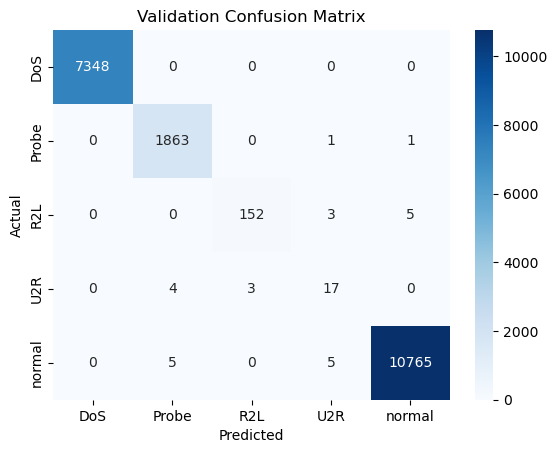

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7348
           1       1.00      1.00      1.00      1865
           2       0.98      0.95      0.97       160
           3       0.65      0.71      0.68        24
           4       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.93      0.93      0.93     20172
weighted avg       1.00      1.00      1.00     20172



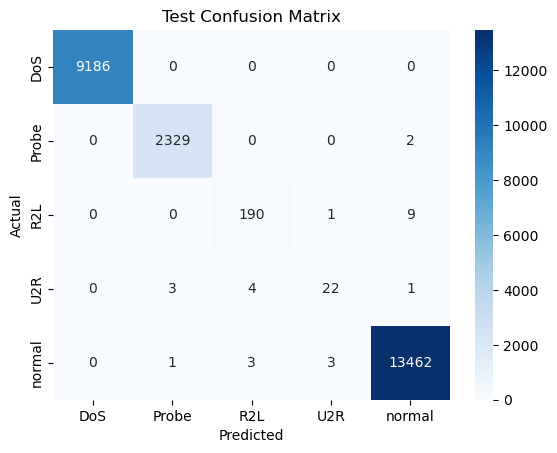

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.96      0.95      0.96       200
         U2R       0.85      0.73      0.79        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.96      0.94      0.95     25216
weighted avg       1.00      1.00      1.00     25216



In [103]:
# Start MLflow run
with mlflow.start_run():
    lgbm = lightgbm.LGBMClassifier(n_estimators=50, max_depth=10, random_state=42)
    lgbm.fit(X_train, y_train)

    # Validation Data
    # Prediction
    y_pred_val = lgbm.predict(X_val)

    # Set tag
    mlflow.set_tag('mlflow.runName', 'lgbm_50_d10')

    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)

    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')

    # Classification Report
    classification_report_val = classification_report(y_val, y_pred_val)
    print('Validation Classification Report:\n', classification_report_val)

    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')

    # Test Data
    # Prediction
    y_pred = lgbm.predict(X_test)

    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)

    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')

    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)

    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')

    # Log model
    mlflow.sklearn.log_model(lgbm, "model")
    
    # Log parameters
    mlflow.log_param("n_estimators", lgbm.n_estimators)
    mlflow.log_param("max_depth", lgbm.max_depth)
    mlflow.log_param("learning_rate", lgbm.learning_rate)
    mlflow.log_param("random_state", lgbm.random_state)

### Voting Classifier

#### Without feature reduction

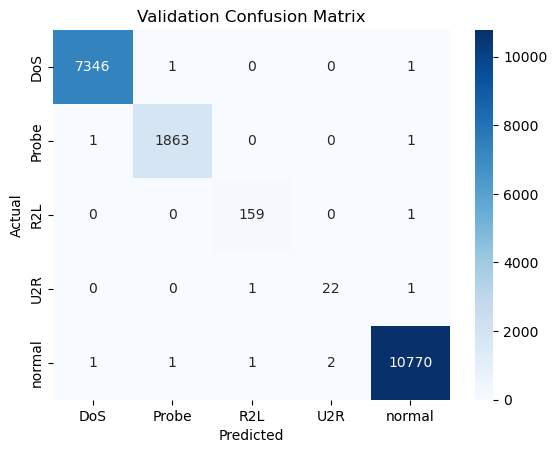

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7348
           1       1.00      1.00      1.00      1865
           2       0.99      0.99      0.99       160
           3       0.92      0.92      0.92        24
           4       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.98      0.98      0.98     20172
weighted avg       1.00      1.00      1.00     20172



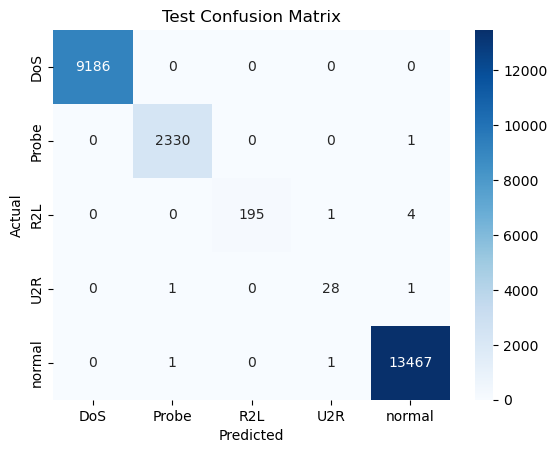

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       1.00      0.97      0.99       200
         U2R       0.93      0.93      0.93        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.99      0.98      0.98     25216
weighted avg       1.00      1.00      1.00     25216



In [136]:
# Start MLflow run
with mlflow.start_run():
    
    # Create a Voting Classifier
    voting_clf = VotingClassifier(estimators=[('rfc', rfc), ('xgb', xgb)], voting='soft', weights=(2,1))

    # Train the Voting Classifier
    voting_clf.fit(X_train, y_train)
    
    # Set tag
    mlflow.set_tag('mlflow.runName', 'vc_soft_w21')

    # Validation Data
    # Prediction
    y_pred_val = voting_clf.predict(X_val)

    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)

    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')

    # Classification Report
    classification_report_val = classification_report(y_val, y_pred_val)
    print('Validation Classification Report:\n', classification_report_val)

    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')

    # Test Data
    # Prediction
    y_pred = voting_clf.predict(X_test)

    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)

    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')

    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)

    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')

    # Log parameters
    mlflow.log_param("voting", voting_clf.voting)

    # Log model
    mlflow.sklearn.log_model(voting_clf, "model")

#### With feature reduction

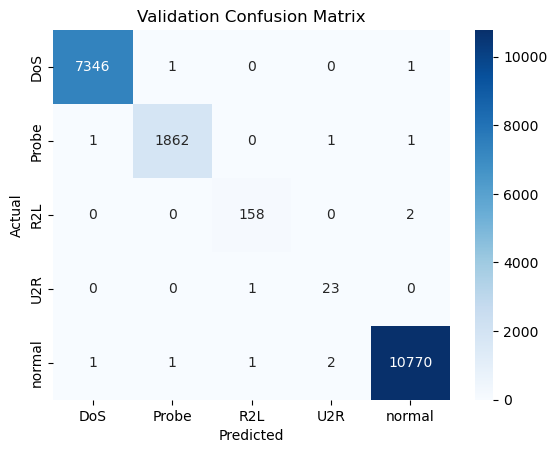

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7348
           1       1.00      1.00      1.00      1865
           2       0.99      0.99      0.99       160
           3       0.88      0.96      0.92        24
           4       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.97      0.99      0.98     20172
weighted avg       1.00      1.00      1.00     20172



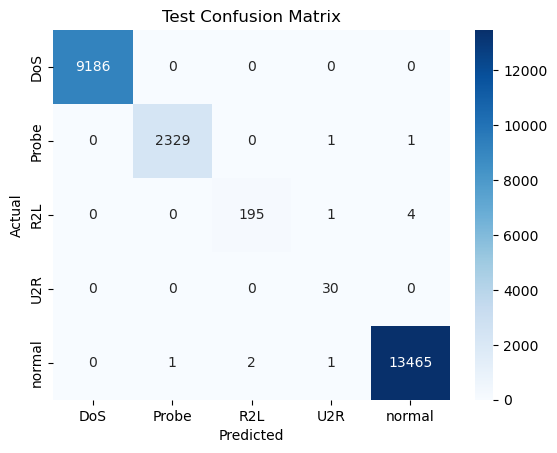

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.99      0.97      0.98       200
         U2R       0.91      1.00      0.95        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.98      0.99      0.99     25216
weighted avg       1.00      1.00      1.00     25216



In [244]:
# Start MLflow run
with mlflow.start_run():
    
    # Create a Voting Classifier
    voting_clf = VotingClassifier(estimators=[('rfc', rfc), ('xgb', xgb)], voting='soft', weights=(2,1))

    # Train the Voting Classifier
    voting_clf.fit(X_train_red, y_train)
    
    # Set tag
    mlflow.set_tag('mlflow.runName', 'vc_soft_red21_w21')

    # Validation Data
    # Prediction
    y_pred_val = voting_clf.predict(X_val_red)

    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)

    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')

    # Classification Report
    classification_report_val = classification_report(y_val, y_pred_val)
    print('Validation Classification Report:\n', classification_report_val)

    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')

    # Test Data
    # Prediction
    y_pred = voting_clf.predict(X_test_red)

    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)

    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')

    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)

    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')

    # Log parameters
    mlflow.log_param("voting", voting_clf.voting)

    # Log model
    mlflow.sklearn.log_model(voting_clf, "model")

#### Probabilities of the prediction

In [245]:
# Create test dataframe
y_test_df = pd.DataFrame(y_test_transform, columns=['y_test'])
y_pred_df = pd.DataFrame(y_pred_transform, columns=['y_pred'])

# Concatenate X_test, y_test_df, and y_pred_df
df_test = pd.concat([pd.DataFrame(X_test_red).reset_index(drop=True), y_test_df.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

In [246]:
# Predict probabilities
df_test['prob_DoS'] = voting_clf.predict_proba(X_test_red)[:, 0]
df_test['prob_Probe'] = voting_clf.predict_proba(X_test_red)[:, 1]
df_test['prob_R2L'] = voting_clf.predict_proba(X_test_red)[:, 2]
df_test['prob_U2R'] = voting_clf.predict_proba(X_test_red)[:, 3]
df_test['prob_normal'] = voting_clf.predict_proba(X_test_red)[:, 4]

In [247]:
def prob_outcome(row, probas):
    y_pred = row['y_pred']
    row_index = row.name  # Get the row index to fetch the correct probability
    if y_pred == 'DoS':
        return probas[row_index, 0]
    elif y_pred == 'Probe':
        return probas[row_index, 1]
    elif y_pred == 'R2L':
        return probas[row_index, 2]
    elif y_pred == 'U2R':
        return probas[row_index, 3]
    else:
        return probas[row_index, 4]

probas = voting_clf.predict_proba(X_test_red)
df_test['prob_outcome'] = df_test.apply(lambda row: prob_outcome(row, probas), axis=1)

In [248]:
df_test.head()

,protocoltype,service,flag,srcbytes,dstbytes,loggedin,count,srvcount,serrorrate,srvserrorrate,...,dsthostsrvserrorrate,lastflag,y_test,y_pred,prob_DoS,prob_Probe,prob_R2L,prob_U2R,prob_normal,prob_outcome
0,-0.124671,-0.442520,0.750639,-0.007723,-0.002793,1.234808,-0.603056,-0.175129,-0.636872,-0.631568,...,-0.624521,0.647002,normal,normal,5.992194e-07,2.834210e-07,3.767282e-07,3.163113e-07,0.999998,0.999998
1,-0.124671,0.780607,-2.224590,-0.007759,-0.004918,-0.809842,3.275170,-0.367941,-0.457640,-0.631568,...,-0.624521,-0.640351,Probe,Probe,1.110784e-05,9.999844e-01,7.635475e-07,7.648681e-07,0.000003,0.999984
2,-0.124671,1.086389,-0.736975,-0.007759,-0.004918,-0.809842,0.305357,-0.120040,1.603530,1.606014,...,1.619868,-0.640351,DoS,DoS,9.999978e-01,7.621733e-07,2.492877e-07,2.022852e-07,0.000001,0.999998
3,2.220245,0.780607,0.750639,-0.007734,-0.004892,-0.809842,-0.716608,-0.354168,-0.636872,-0.631568,...,-0.624521,0.647002,normal,normal,8.600320e-07,2.876967e-06,5.814064e-07,3.278527e-07,0.999995,0.999995
4,-0.124671,-0.442520,0.750639,-0.007702,-0.004725,1.234808,-0.629261,0.114088,-0.636872,-0.631568,...,-0.624521,0.647002,normal,normal,5.815948e-07,3.234310e-07,3.319479e-07,3.095102e-07,0.999998,0.999998


In [249]:
df_test[df_test['y_test']!=df_test['y_pred']]

,protocoltype,service,flag,srcbytes,dstbytes,loggedin,count,srvcount,serrorrate,srvserrorrate,...,dsthostsrvserrorrate,lastflag,y_test,y_pred,prob_DoS,prob_Probe,prob_R2L,prob_U2R,prob_normal,prob_outcome
2920,-0.124671,1.086389,-2.224590,-0.007759,-0.004918,-0.809842,-0.725343,-0.367941,-0.636872,-0.631568,...,-0.624521,-4.502410,normal,Probe,0.006834,0.722690,0.003463,0.000290,0.266724,0.722690
6750,-0.124671,-0.748302,0.750639,-0.007581,-0.004151,1.234808,-0.725343,-0.367941,-0.636872,-0.631568,...,-0.624521,-1.927704,normal,R2L,0.011205,0.012761,0.492942,0.008551,0.474541,0.492942
8111,-0.124671,1.392171,0.750639,-0.007542,-0.004784,1.234808,-0.725343,-0.367941,-0.636872,-0.631568,...,-0.624521,-6.647998,Probe,U2R,0.005541,0.264331,0.138202,0.425018,0.166909,0.425018
8827,-0.124671,-0.687146,0.750639,-0.007458,-0.004918,1.234808,-0.725343,-0.367941,-0.636872,-0.631568,...,-0.624521,-3.644175,normal,R2L,0.000112,0.003379,0.847363,0.000055,0.149091,0.847363
10225,-0.124671,1.086389,-1.480783,-0.007759,-0.004918,-0.809842,-0.716608,-0.354168,0.483329,0.487223,...,0.497674,0.217884,Probe,normal,0.101245,0.396651,0.006942,0.000313,0.494849,0.494849
14461,-0.124671,-0.687146,0.750639,-0.007759,-0.003443,1.234808,-0.725343,-0.367941,-0.636872,-0.631568,...,-0.624521,-3.644175,normal,U2R,0.000161,0.003920,0.059353,0.736945,0.199621,0.736945
17842,-0.124671,1.759109,-1.852686,-0.007738,-0.004873,-0.809842,-0.716608,-0.354168,0.483329,0.487223,...,0.497674,-0.211233,R2L,normal,0.035205,0.016693,0.230122,0.006682,0.711297,0.711297
21568,-0.124671,1.759109,0.378735,-0.007738,-0.004873,-0.809842,-0.725343,-0.367941,1.603530,1.606014,...,1.619868,-1.069469,R2L,normal,0.055921,0.027122,0.098091,0.010133,0.808733,0.808733
21719,-0.124671,-0.687146,0.750639,-0.007759,-0.004707,-0.809842,-0.716608,-0.354168,-0.636872,-0.631568,...,-0.624521,-2.785939,R2L,U2R,0.000040,0.036768,0.163026,0.652993,0.147173,0.652993
22241,-0.124671,1.759109,0.378735,-0.007738,-0.004873,-0.809842,-0.716608,-0.354168,0.483329,0.487223,...,-0.422526,-1.927704,R2L,normal,0.010113,0.006707,0.193753,0.006683,0.782743,0.782743


### ML flow UI

In [265]:
!mlflow ui -p 8800

[2024-08-04 23:02:33 +0530] [25984] [INFO] Starting gunicorn 22.0.0
[2024-08-04 23:02:33 +0530] [25984] [INFO] Listening at: http://127.0.0.1:8800 (25984)
[2024-08-04 23:02:33 +0530] [25984] [INFO] Using worker: sync
[2024-08-04 23:02:33 +0530] [25985] [INFO] Booting worker with pid: 25985
[2024-08-04 23:02:33 +0530] [25989] [INFO] Booting worker with pid: 25989
[2024-08-04 23:02:33 +0530] [25990] [INFO] Booting worker with pid: 25990
[2024-08-04 23:02:33 +0530] [25991] [INFO] Booting worker with pid: 25991
^C
[2024-08-04 23:02:43 +0530] [25984] [INFO] Handling signal: int
[2024-08-04 23:02:43 +0530] [25985] [INFO] Worker exiting (pid: 25985)
[2024-08-04 23:02:43 +0530] [25990] [INFO] Worker exiting (pid: 25990)
[2024-08-04 23:02:43 +0530] [25989] [INFO] Worker exiting (pid: 25989)
[2024-08-04 23:02:43 +0530] [25991] [INFO] Worker exiting (pid: 25991)


### Final Model Building

#### Standardization of data - 21 features

In [250]:
cols = df_red['Feature'].tolist()

In [252]:
X_red = X.drop(cols, axis=1)

col = X_red.columns

scaler = StandardScaler()
X_std = scaler.fit_transform(X_red)
X_std = pd.DataFrame(X_std, columns=col)

In [253]:
X_std.head()

,protocoltype,service,flag,srcbytes,dstbytes,loggedin,count,srvcount,serrorrate,srvserrorrate,...,diffsrvrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,lastflag
0,-0.124671,-0.687146,0.750639,-0.007676,-0.004918,-0.809842,-0.716608,-0.354168,-0.636872,-0.631568,...,-0.349635,-0.322942,-0.818153,-0.782757,-0.280143,0.068896,-0.289204,-0.639164,-0.624521,0.217884
1,2.220245,0.780607,0.750639,-0.007734,-0.004918,-0.809842,-0.620526,-0.367941,-0.636872,-0.631568,...,0.482152,0.734859,-1.034958,-1.161428,2.737656,2.364542,-0.289204,-0.639164,-0.624521,-1.927704
2,-0.124671,1.086389,-0.736975,-0.007759,-0.004918,-0.809842,0.340296,-0.299079,1.603530,1.606014,...,0.038532,0.734859,-0.809119,-0.938680,-0.174255,-0.480766,-0.289204,1.609670,1.619868,-0.211233
3,-0.124671,-0.442520,0.750639,-0.007720,-0.002889,1.234808,-0.690404,-0.312852,-0.188791,-0.184051,...,-0.349635,-1.531857,1.259558,1.066048,-0.438974,-0.383767,0.065858,-0.571699,-0.602077,0.647002
4,-0.124671,-0.442520,0.750639,-0.007725,-0.004813,1.234808,-0.472035,0.058999,-0.636872,-0.631568,...,-0.349635,0.734859,1.259558,1.066048,-0.438974,-0.480766,-0.289204,-0.639164,-0.624521,0.647002


#### Train Test Split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

#### RandomForest Classification

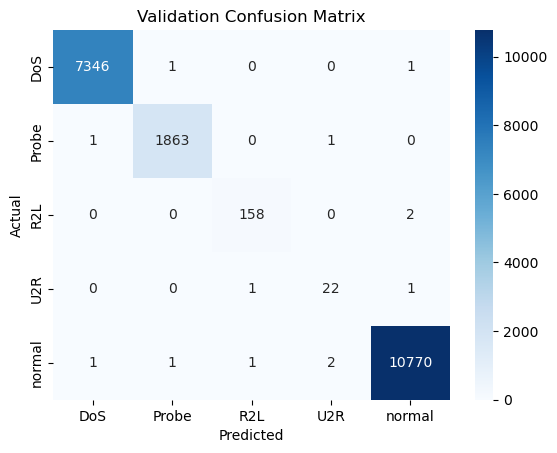

Validation Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      7348
       Probe       1.00      1.00      1.00      1865
         R2L       0.99      0.99      0.99       160
         U2R       0.88      0.92      0.90        24
      normal       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.97      0.98      0.98     20172
weighted avg       1.00      1.00      1.00     20172



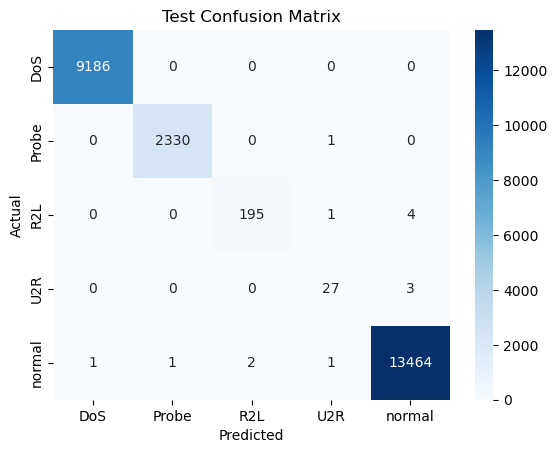

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.99      0.97      0.98       200
         U2R       0.90      0.90      0.90        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.98      0.97      0.98     25216
weighted avg       1.00      1.00      1.00     25216



In [256]:
with mlflow.start_run():
    # Train the model
    rfc = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    rfc.fit(X_train, y_train)
    
    # set tag
    mlflow.set_tag('mlflow.runName', 'rf_red_200_d20_red21')
    
    # Validation Data
    # Prediction
    y_pred_val = rfc.predict(X_val)
    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)
    
    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')
    
    # Classification Report
    y_val_transform = le.inverse_transform(y_val)
    y_pred_val_transform = le.inverse_transform(y_pred_val)
    classification_report_val = classification_report(y_val_transform, y_pred_val_transform)
    print('Validation Classification Report:\n', classification_report_val)
    
    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')
    
    # Test Data
    # Prediction
    y_pred = rfc.predict(X_test)
    
    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')
    
    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)
    
    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log model
    mlflow.sklearn.log_model(rfc, "model")

    # Log parameters
    mlflow.log_param("n_estimators", rfc.n_estimators)
    mlflow.log_param("max_depth", rfc.max_depth)
    mlflow.log_param("random_state", rfc.random_state)

#### XGBoost

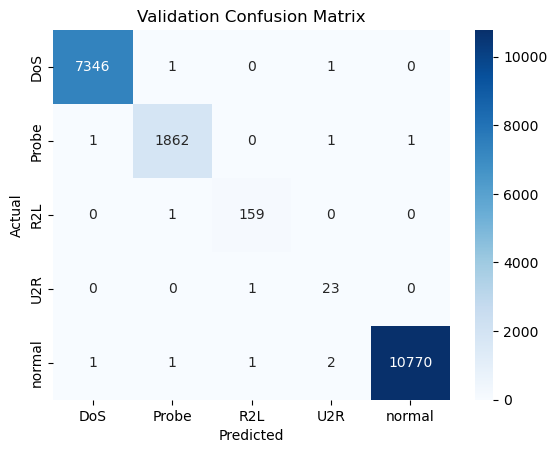

Validation Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      7348
       Probe       1.00      1.00      1.00      1865
         R2L       0.99      0.99      0.99       160
         U2R       0.85      0.96      0.90        24
      normal       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.97      0.99      0.98     20172
weighted avg       1.00      1.00      1.00     20172



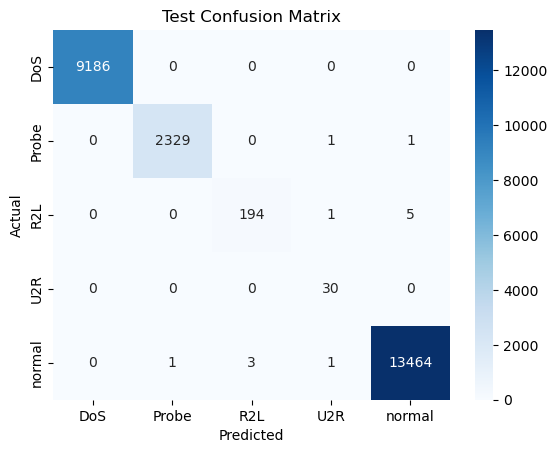

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.98      0.97      0.98       200
         U2R       0.91      1.00      0.95        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.98      0.99      0.99     25216
weighted avg       1.00      1.00      1.00     25216



In [257]:
with mlflow.start_run():
    # Train the model
    xgb = XGBClassifier(n_estimators=250, max_depth=20, learning_rate=0.06, random_state=42)
    xgb.fit(X_train, y_train)
    
    # set tag
    mlflow.set_tag('mlflow.runName', 'xgb_n250_d20_l.06_red21')
        
    # Validation Data
    # Prediction
    y_pred_val = xgb.predict(X_val)
    
    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)
    
    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')
    
    # Classification Report
    y_val_transform = le.inverse_transform(y_val)
    y_pred_val_transform = le.inverse_transform(y_pred_val)
    classification_report_val = classification_report(y_val_transform, y_pred_val_transform)
    print('Validation Classification Report:\n', classification_report_val)
    
    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')
    
    # Test Data
    # Prediction
    y_pred = xgb.predict(X_test)
    
    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)
    
    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')
    
    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)
    
    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')
    
    # Log model
    mlflow.sklearn.log_model(xgb, "model")

    # Log parameters
    mlflow.log_param("n_estimators", xgb.n_estimators)
    mlflow.log_param("max_depth", xgb.max_depth)
    mlflow.log_param("learning_rate", xgb.learning_rate)
    mlflow.log_param("random_state", xgb.random_state)

#### Voting Classifier

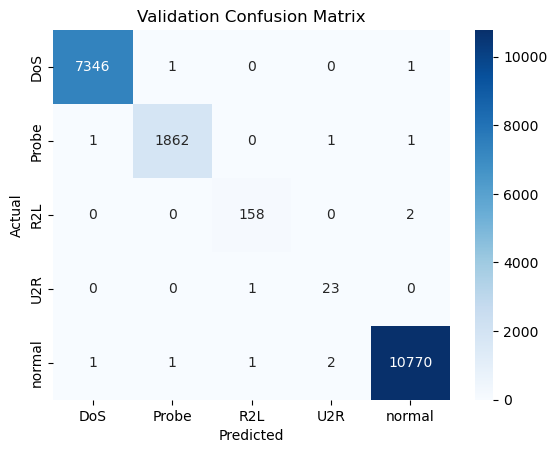

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7348
           1       1.00      1.00      1.00      1865
           2       0.99      0.99      0.99       160
           3       0.88      0.96      0.92        24
           4       1.00      1.00      1.00     10775

    accuracy                           1.00     20172
   macro avg       0.97      0.99      0.98     20172
weighted avg       1.00      1.00      1.00     20172



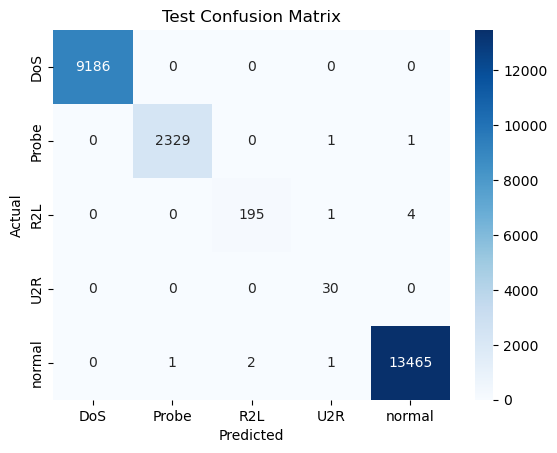

Test Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
       Probe       1.00      1.00      1.00      2331
         R2L       0.99      0.97      0.98       200
         U2R       0.91      1.00      0.95        30
      normal       1.00      1.00      1.00     13469

    accuracy                           1.00     25216
   macro avg       0.98      0.99      0.99     25216
weighted avg       1.00      1.00      1.00     25216



In [261]:
# Start MLflow run
with mlflow.start_run():
    
    # Create a Voting Classifier
    voting_clf = VotingClassifier(estimators=[('rfc', rfc), ('xgb', xgb)], voting='soft', weights=(2,1))

    # Train the Voting Classifier
    voting_clf.fit(X_train, y_train)
    
    # Set tag
    mlflow.set_tag('mlflow.runName', 'vc_soft_red21_w21')

    # Validation Data
    # Prediction
    y_pred_val = voting_clf.predict(X_val)

    # Accuracy
    val_acc = accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("val_accuracy", val_acc)

    # Confusion Matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Validation Confusion Matrix')
    plt.savefig('val_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('val_confusion_matrix.png')

    # Classification Report
    classification_report_val = classification_report(y_val, y_pred_val)
    print('Validation Classification Report:\n', classification_report_val)

    with open('val_classification_report.txt', 'w') as f:
        f.write(classification_report_val)
    mlflow.log_artifact('val_classification_report.txt')

    # Test Data
    # Prediction
    y_pred = voting_clf.predict(X_test)

    # Accuracy
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("test_accuracy", test_acc)

    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Confusion Matrix')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
    mlflow.log_artifact('test_confusion_matrix.png')

    # Classification Report
    y_test_transform = le.inverse_transform(y_test)
    y_pred_transform = le.inverse_transform(y_pred)
    classification_report_test = classification_report(y_test_transform, y_pred_transform)
    print('Test Classification Report:\n', classification_report_test)

    with open('test_classification_report.txt', 'w') as f:
        f.write(classification_report_test)
    mlflow.log_artifact('test_classification_report.txt')

    # Log parameters
    mlflow.log_param("voting", voting_clf.voting)

    # Log model
    mlflow.sklearn.log_model(voting_clf, "model")

### Pickle

In [262]:
model_path = '/Users/saumyanishi/Documents/GitHub/Cybersecurity/model/model.pkl'

# Save the model
with open(model_path, 'wb') as f:
    pickle.dump((voting_clf, scaler), f)